# MSDS 6372 Logistic Regression - Linear Discriminant Analysis -  KMeans Clustering

## Project 2

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the data
kobe = pd.read_csv('KobeDataProj2.csv')

## Exploratory Data Analysis

In [4]:
kobe.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id,attendance,arena_temp,avgnoisedb
0,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,8-16 ft.,1610612747,Los Angeles Lakers,10/31/00,LAL @ POR,POR,2,14707,69,94.06
1,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,16-24 ft.,1610612747,Los Angeles Lakers,10/31/00,LAL @ POR,POR,3,14707,69,94.06
2,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,16-24 ft.,1610612747,Los Angeles Lakers,10/31/00,LAL @ POR,POR,4,14707,69,94.06
3,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,Less Than 8 ft.,1610612747,Los Angeles Lakers,10/31/00,LAL @ POR,POR,5,14707,69,94.06
4,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,8-16 ft.,1610612747,Los Angeles Lakers,10/31/00,LAL @ POR,POR,6,14707,69,94.06


In [5]:
kobe.shape

(30697, 28)

In [6]:
kobe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 28 columns):
action_type           30697 non-null object
combined_shot_type    30697 non-null object
game_event_id         30697 non-null int64
game_id               30697 non-null int64
lat                   30697 non-null float64
loc_x                 30697 non-null int64
loc_y                 30697 non-null int64
lon                   30697 non-null float64
minutes_remaining     30697 non-null int64
period                30697 non-null int64
playoffs              30697 non-null int64
season                30697 non-null object
seconds_remaining     30697 non-null int64
shot_distance         30697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             30697 non-null object
shot_zone_area        30697 non-null object
shot_zone_basic       30697 non-null object
shot_zone_range       30697 non-null object
team_id               30697 non-null int64
team_name         

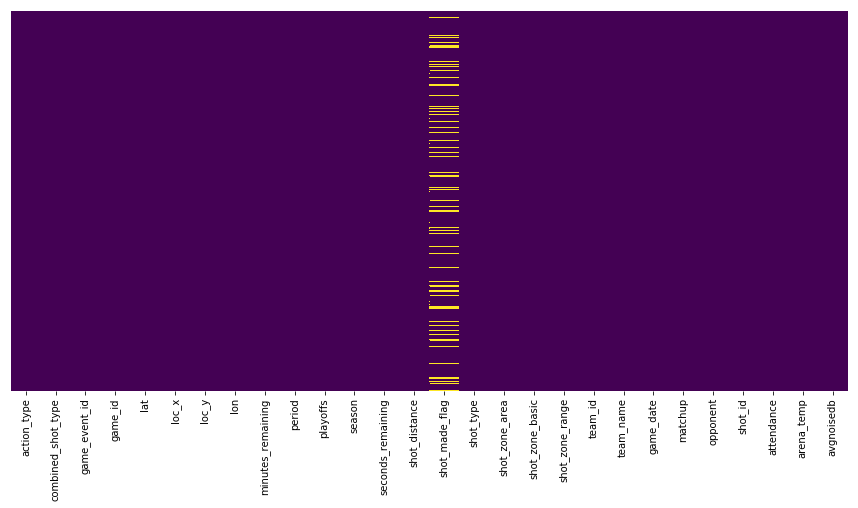

In [7]:
# To get a top view of missing data use heatmap

#axe = plt.axes()

plt.figure(figsize=(15, 7))
sns.heatmap(data = kobe.isnull(), yticklabels =False, cbar=False, cmap='viridis')

#axe.set_title('Heat Map of Full Data')

In [8]:
kobe_full = kobe.drop(['shot_made_flag'], axis =1)

In [9]:
#kobe_full.info()

In [10]:
kobe_full.shape

(30697, 27)

In [11]:
## Create a new Data Frame to do EDA
kobe_train = kobe.dropna()

In [12]:
kobe_train.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id,attendance,arena_temp,avgnoisedb
count,25697.000000,2.569700e+04,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,2.569700e+04,25697.000000,25697.000000,25697.000000,25697.000000
mean,249.348679,2.474109e+07,33.953043,7.148422,91.257345,-118.262652,4.886796,2.520800,0.146243,28.311554,13.457096,0.446161,1.610613e+09,15328.166946,15040.683621,70.107717,94.951369
std,149.778520,7.738108e+06,0.088152,110.073147,88.152106,0.110073,3.452475,1.151626,0.353356,17.523392,9.388725,0.497103,0.000000e+00,8860.462397,1076.226662,2.030165,2.281707
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,2.000000,11065.000000,64.000000,88.560000
25%,111.000000,2.050006e+07,33.884300,-67.000000,4.000000,-118.336800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7646.000000,14314.000000,69.000000,93.400000
50%,253.000000,2.090034e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15336.000000,15048.000000,70.000000,94.920000
75%,367.000000,2.960027e+07,34.040300,94.000000,160.000000,-118.175800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,22976.000000,15738.000000,71.000000,96.490000
max,653.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000,20845.000000,79.000000,102.430000


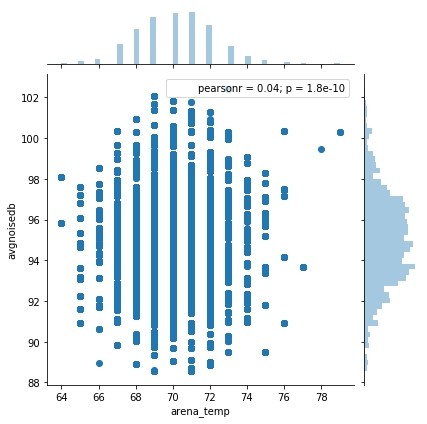

In [13]:
sns.jointplot(x= 'arena_temp', y = 'avgnoisedb', data=kobe_train)

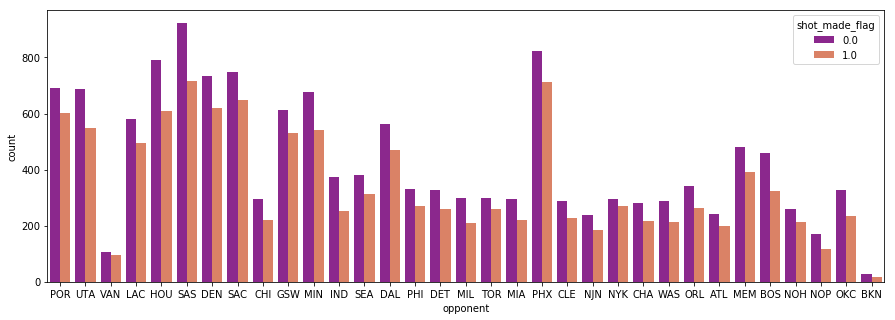

In [14]:
# Kobes score / no score trend(count) aganist each teams

plt.figure(figsize=(15,5))
sns.countplot(x=kobe_train['opponent'], hue = kobe_train['shot_made_flag'], palette='plasma')

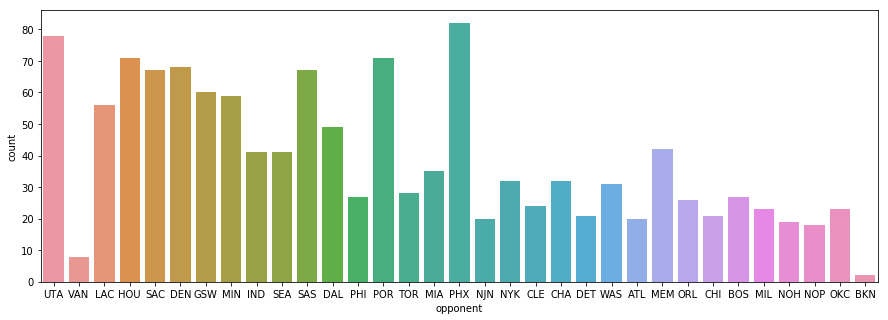

In [15]:
# Kobe's shooting trend in the last 5 secs with each team

plt.figure(figsize=(15,5))
sns.countplot(x=kobe_train[(kobe_train['shot_made_flag']==1) & (kobe_train['seconds_remaining'] < 6) ]['opponent'])

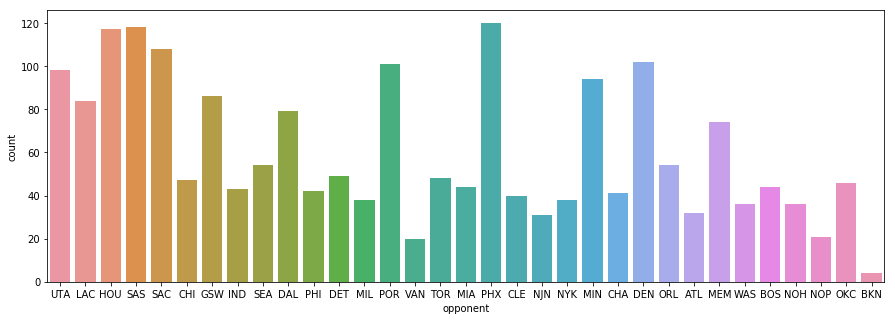

In [16]:
# Kobe's shot miss trend in the last 5 secs with each team

plt.figure(figsize=(15,5))
sns.countplot(x=kobe_train[(kobe_train['shot_made_flag']==0) & (kobe_train['seconds_remaining'] < 6)]['opponent'])

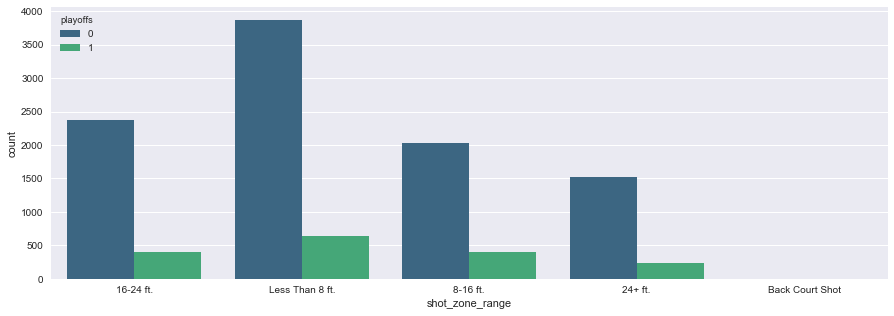

In [46]:
# Kobes shot range and scoring trend in playoffs

plt.figure(figsize=(15,5))
sns.countplot(x=kobe_train[kobe_train['shot_made_flag']== 1]['shot_zone_range'], 
              hue = kobe_train['playoffs'],palette='viridis')

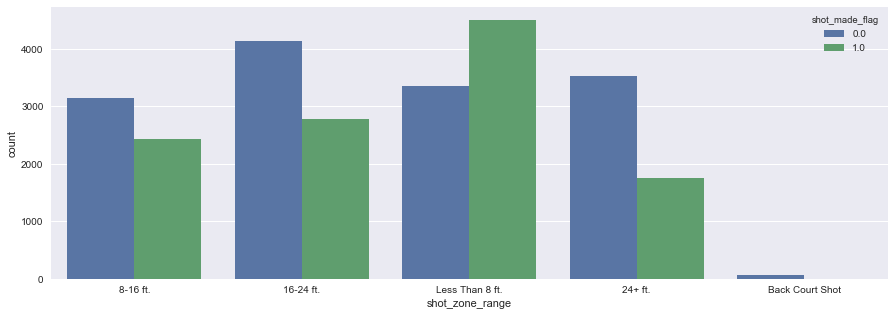

In [47]:
# Kobes shot range and score / no score count both (0 & 1)

plt.figure(figsize=(15,5))
sns.countplot(x=kobe_train['shot_zone_range'], hue = kobe_train['shot_made_flag'])

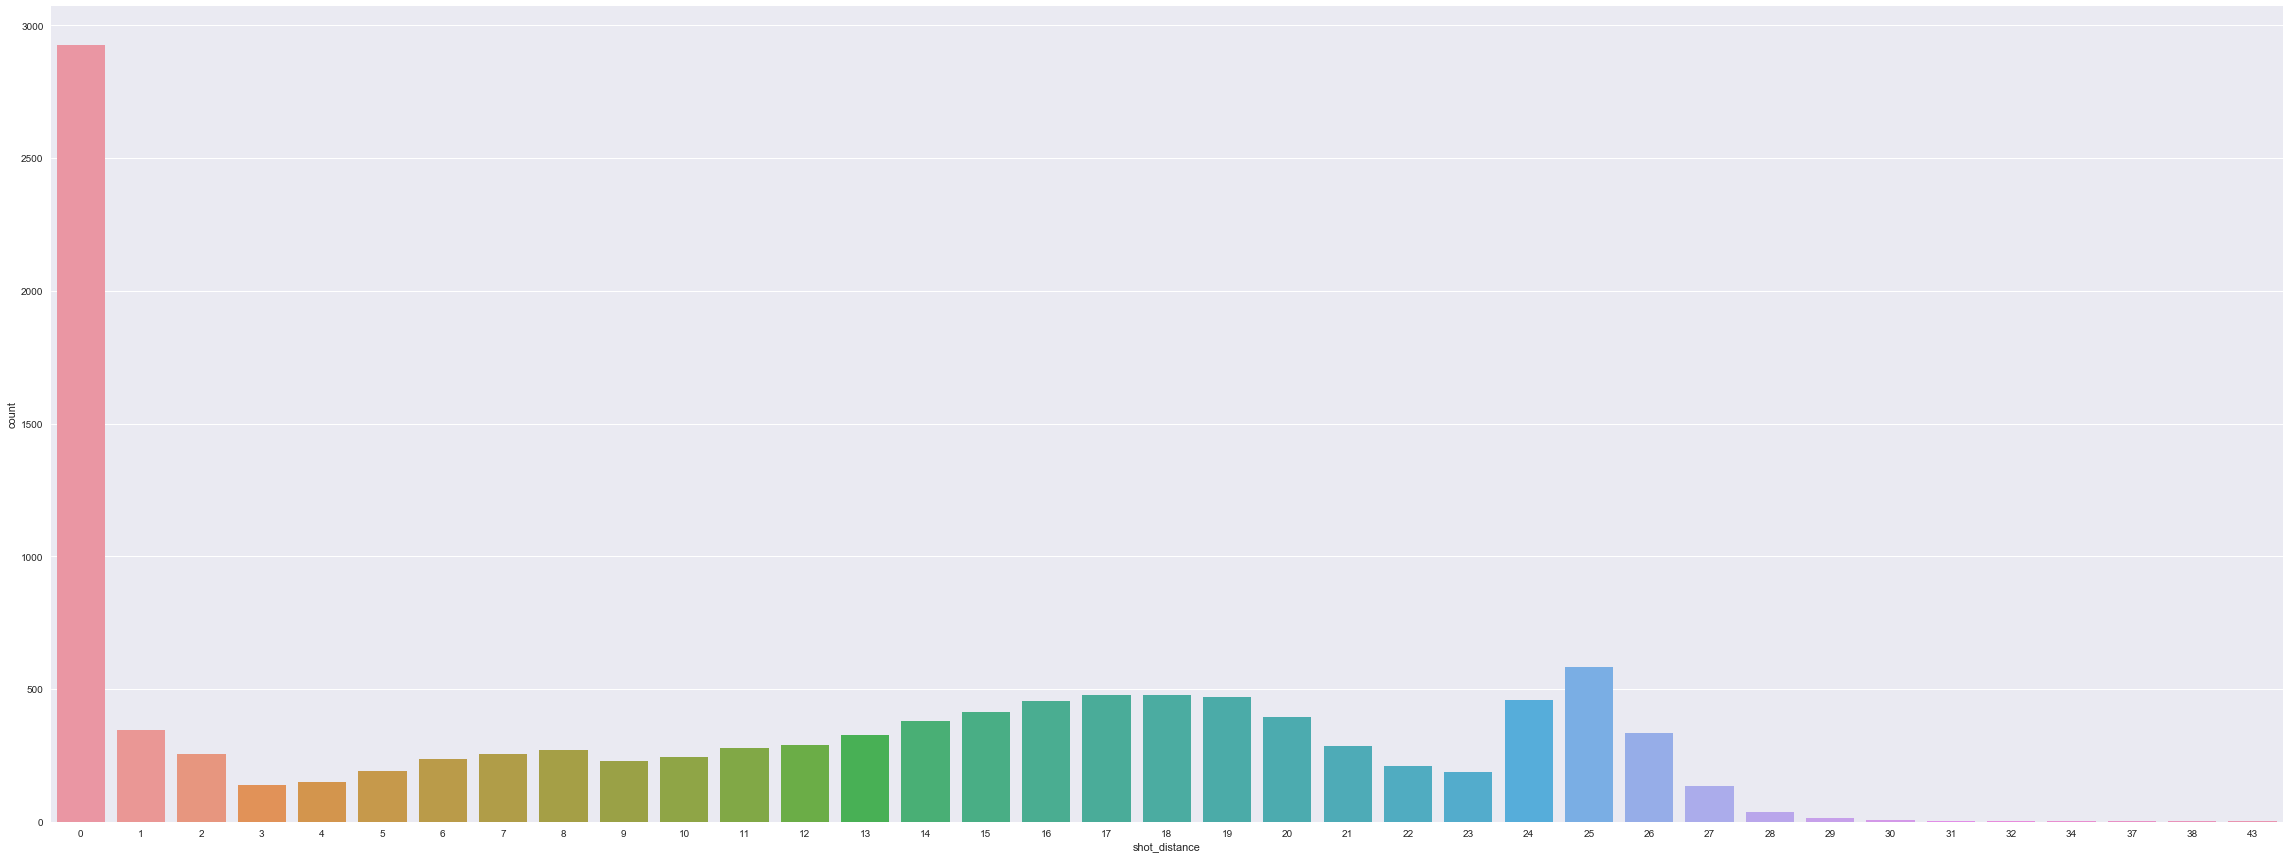

In [48]:
#2   The probability of Kobe making a shot decreases linearly with respect to the distance he is from the hoop.    
#   If there is evidence of this, quantify this relationship.  (CIs, plots, etc.)

plt.figure(figsize=(40,15))

#sns.lmplot(data = kobe_train, x='shot_distance', y ='seconds_remaining')
sns.countplot(x=kobe_train[(kobe_train['shot_made_flag']==1)]['shot_distance'])

In [20]:
kobe_train['shot_made_flag'].unique()

array([ 0.,  1.])

In [21]:
np.nan

nan

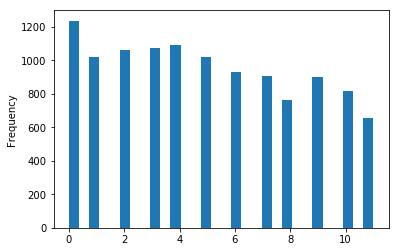

In [22]:
kobe_train[kobe_train['shot_made_flag']== 1]['minutes_remaining'].plot.hist(bins = 30)

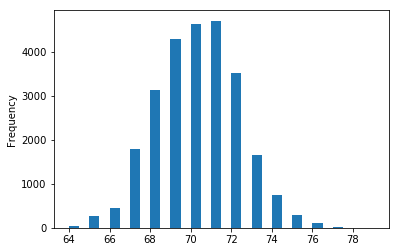

In [23]:
kobe_train['arena_temp'].plot.hist(bins = 30)

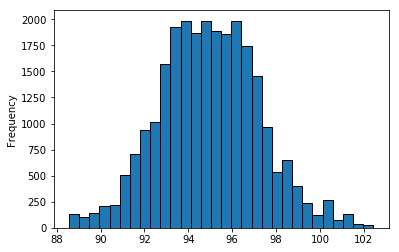

In [24]:
kobe_train['avgnoisedb'].plot.hist(bins = 30, ec='black')

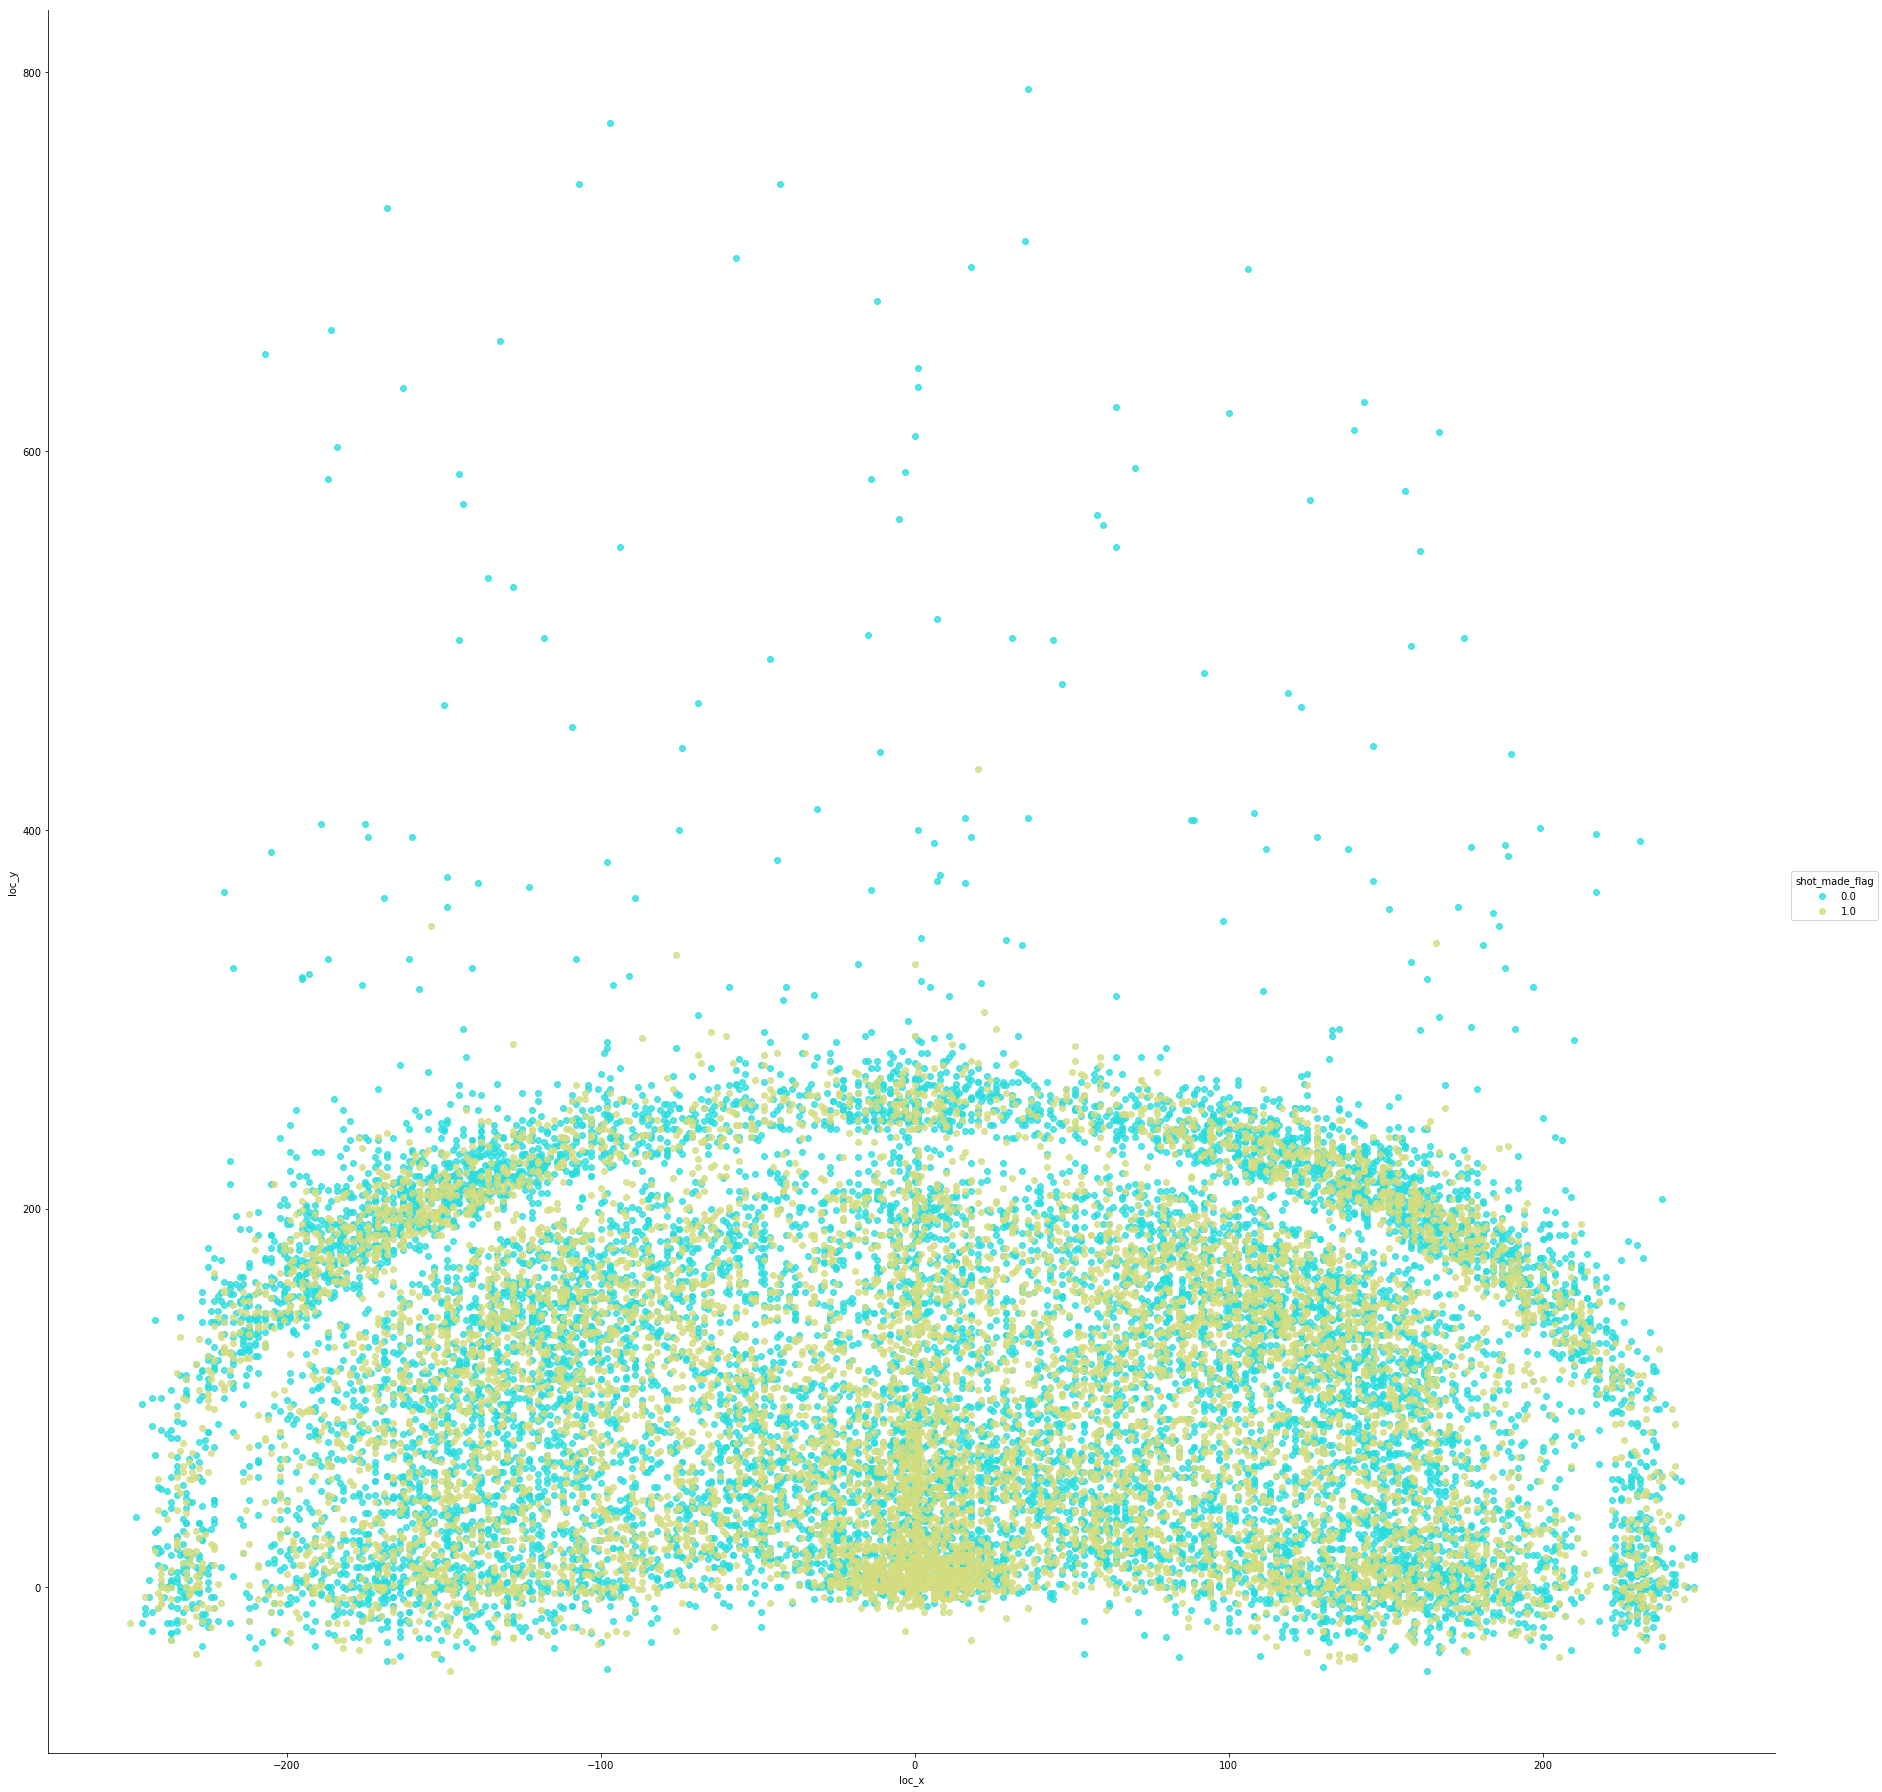

In [25]:
plt.figure(figsize=(45,5))
#plt.scatter(kobe_train['loc_x'], kobe_train['loc_y'],)

sns.lmplot('loc_x', 'loc_y',kobe_train, hue='shot_made_flag', fit_reg=False,size=25, palette='rainbow' )

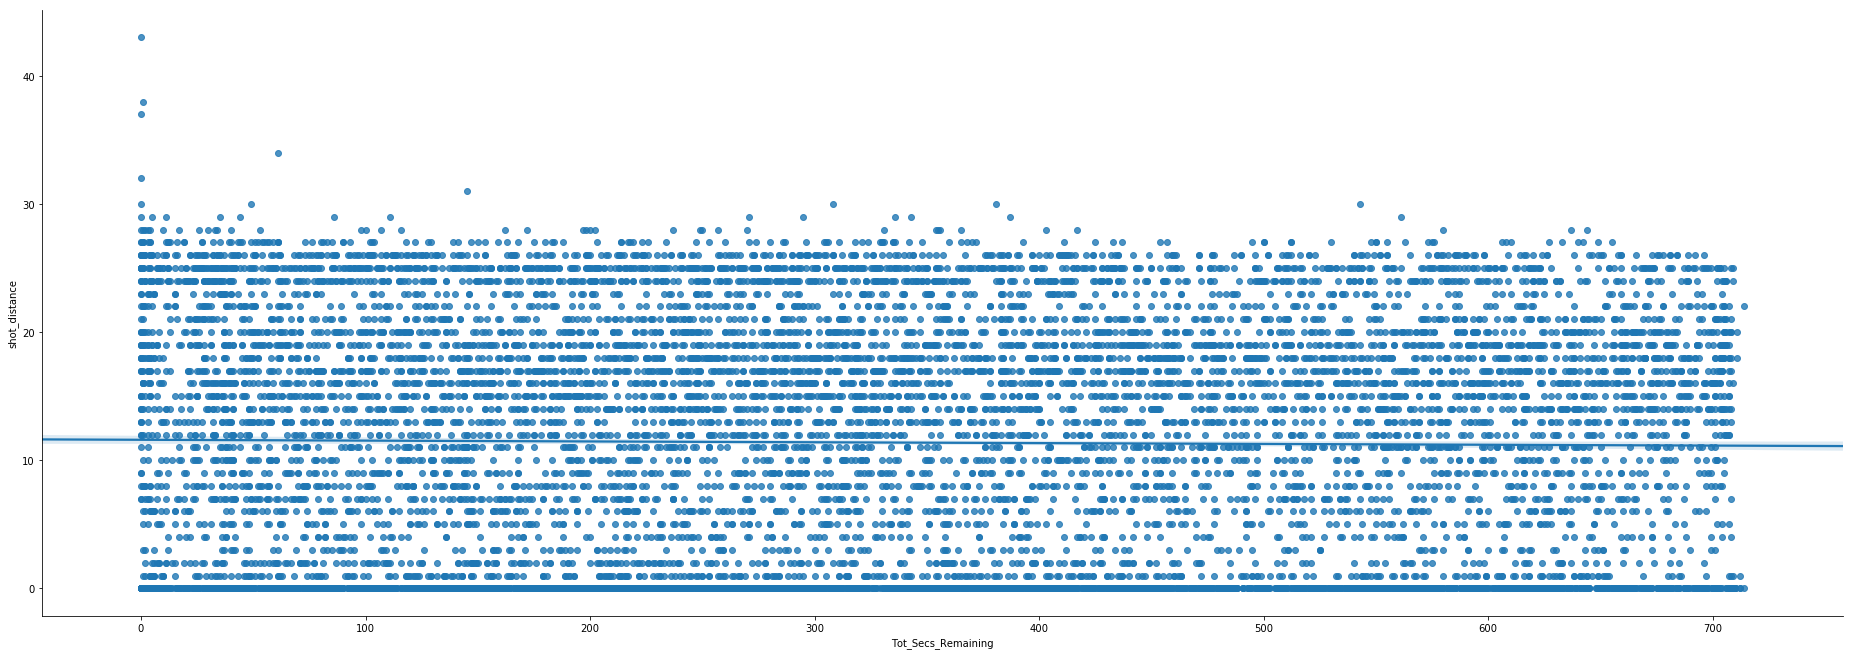

In [37]:
#plt.rcParams['figure.figsize']=(50,10)

g = sns.lmplot(x='Tot_Secs_Remaining',
           y='shot_distance', data =full[full['shot_made_flag'] == 1])

g.fig.set_size_inches(30,10)

### Data Cleaning

In [15]:
# find out the correlation between variables

kobe_full.corr()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,team_id,shot_id,attendance,arena_temp,avgnoisedb
game_event_id,1.000000,-0.002553,-0.060091,-0.028404,0.060091,-0.028404,-0.270736,0.956042,-0.004507,-0.021293,0.062077,NaN,0.028478,-0.015589,-0.000768,-0.013370
game_id,-0.002553,1.000000,0.013021,-0.019553,-0.013021,-0.019553,0.014481,0.009879,0.917235,-0.007107,-0.030327,NaN,0.761656,0.010141,-0.039030,0.015460
lat,-0.060091,0.013021,1.000000,0.016217,-1.000000,0.016217,0.071462,-0.041248,-0.001143,0.052714,-0.818517,NaN,-0.030790,0.011725,0.003428,0.005801
loc_x,-0.028404,-0.019553,0.016217,1.000000,-0.016217,1.000000,0.006898,-0.028165,-0.012790,0.001083,0.022654,NaN,-0.019917,0.005371,0.009005,-0.010019
loc_y,0.060091,-0.013021,-1.000000,-0.016217,1.000000,-0.016217,-0.071462,0.041248,0.001143,-0.052714,0.818517,NaN,0.030790,-0.011725,-0.003428,-0.005801
lon,-0.028404,-0.019553,0.016217,1.000000,-0.016217,1.000000,0.006898,-0.028165,-0.012790,0.001083,0.022654,NaN,-0.019917,0.005371,0.009005,-0.010019
minutes_remaining,-0.270736,0.014481,0.071462,0.006898,-0.071462,0.006898,1.000000,-0.043425,0.015101,0.025558,-0.059767,NaN,-0.005731,-0.004850,-0.006246,-0.003316
period,0.956042,0.009879,-0.041248,-0.028165,0.041248,-0.028165,-0.043425,1.000000,0.008789,0.005832,0.046993,NaN,0.000364,-0.013676,-0.000139,-0.010295
playoffs,-0.004507,0.917235,-0.001143,-0.012790,0.001143,-0.012790,0.015101,0.008789,1.000000,-0.002490,-0.008667,NaN,0.612571,0.003806,-0.046134,0.011154
seconds_remaining,-0.021293,-0.007107,0.052714,0.001083,-0.052714,0.001083,0.025558,0.005832,-0.002490,1.000000,-0.051482,NaN,-0.004868,0.003681,0.001509,-0.000590


In [16]:
#Find highly correlated pairs

corr_matrix = kobe_full.corr().abs()
high_corr_var=np.where(corr_matrix>0.8)
high_corr_var=[(corr_matrix.index[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]

In [17]:
high_corr_var


[('game_event_id', 'period'),
 ('game_id', 'playoffs'),
 ('lat', 'loc_y'),
 ('lat', 'shot_distance'),
 ('loc_x', 'lon'),
 ('loc_y', 'shot_distance')]

In [18]:
# Delete Correlated and other non significant Variables

kobe_full = kobe_full.drop(['team_name','team_id','game_date','game_id', 'game_event_id','lat','lon','loc_x',
                            'loc_y'], axis = 1 )



In [19]:
kobe_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 18 columns):
action_type           30697 non-null object
combined_shot_type    30697 non-null object
minutes_remaining     30697 non-null int64
period                30697 non-null int64
playoffs              30697 non-null int64
season                30697 non-null object
seconds_remaining     30697 non-null int64
shot_distance         30697 non-null int64
shot_type             30697 non-null object
shot_zone_area        30697 non-null object
shot_zone_basic       30697 non-null object
shot_zone_range       30697 non-null object
matchup               30697 non-null object
opponent              30697 non-null object
shot_id               30697 non-null int64
attendance            30697 non-null int64
arena_temp            30697 non-null int64
avgnoisedb            30697 non-null float64
dtypes: float64(1), int64(8), object(9)
memory usage: 4.2+ MB


In [20]:
#sns.pairplot(full_train[['Tot_Secs_Remaining','shot_distance']], hue=full_train['playoffs'])

In [21]:
# Deal with categorical values in full data

action_type_dmyfull = pd.get_dummies(kobe_full['action_type'], drop_first=True)
combined_shot_type_dmyfull = pd.get_dummies(kobe_full['combined_shot_type'], drop_first=True)
shot_type_dmyfull = pd.get_dummies(kobe_full['shot_type'], drop_first=True)
shot_zone_area_dmyfull = pd.get_dummies(kobe_full['shot_zone_area'], drop_first=True)
shot_zone_basic_dmyfull = pd.get_dummies(kobe_full['shot_zone_basic'], drop_first=True)
shot_zone_range_dmyfull = pd.get_dummies(kobe_full['shot_zone_range'], drop_first=True)
matchup_dmyfull = pd.get_dummies(kobe_full['matchup'], drop_first=True)
opponent_dmyfull = pd.get_dummies(kobe_full['opponent'], drop_first=True)
season_dmyfull = pd.get_dummies(kobe_full['season'], drop_first=True)

In [22]:
# Concatenate the Dummy variables to the full DF

In [23]:
kobe_full = pd.concat([kobe_full,action_type_dmyfull,combined_shot_type_dmyfull,shot_type_dmyfull,
                       shot_zone_area_dmyfull,
                       shot_zone_basic_dmyfull,shot_zone_range_dmyfull,matchup_dmyfull,
                       opponent_dmyfull,season_dmyfull], 
                       axis = 1 )

In [24]:
kobe_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Columns: 219 entries, action_type to 2015-16
dtypes: float64(1), int64(8), object(9), uint8(201)
memory usage: 10.1+ MB


### Feature Engineering

In [25]:
### Feature Engineering 

# Create new column for total seconds remaining
kobe_full['Tot_Secs_Remaining'] = kobe_full['seconds_remaining'] +  (kobe_full['minutes_remaining'] * 60)


In [26]:
# Drop the categorical variables existing in the full DF, Included date 'game_date' to drop for now, need review this.

full = kobe_full.drop(['action_type','combined_shot_type','shot_type','shot_zone_area','shot_zone_basic',
                       'shot_zone_range','matchup','opponent','season','seconds_remaining','minutes_remaining'
                         ], axis = 1 )

In [27]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Columns: 209 entries, period to Tot_Secs_Remaining
dtypes: float64(1), int64(7), uint8(201)
memory usage: 7.8 MB


In [28]:
full.corr()

,period,playoffs,shot_distance,shot_id,attendance,arena_temp,avgnoisedb,Alley Oop Layup shot,Cutting Finger Roll Layup Shot,Cutting Layup Shot,...,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,Tot_Secs_Remaining
period,1.000000,0.008789,0.046993,0.000364,-0.013676,-0.000139,-0.010295,0.000801,0.002378,0.001784,...,-0.010210,-0.006573,-0.008586,-0.010265,0.012529,0.008981,-0.002851,-0.001566,-0.038691,-0.042689
playoffs,0.008789,1.000000,-0.008667,0.612571,0.003806,-0.046134,0.011154,-0.012150,-0.002365,-0.005794,...,0.053184,0.071299,0.075552,-0.031736,0.025039,-0.096952,-0.020233,-0.063903,-0.080379,0.014806
shot_distance,0.046993,-0.008667,1.000000,0.015695,-0.019039,-0.006810,-0.009977,-0.071093,-0.006964,-0.018303,...,0.013706,0.010021,0.000666,0.014236,0.022487,0.010938,0.003929,0.029073,0.080872,-0.063750
shot_id,0.000364,0.612571,0.015695,1.000000,-0.019922,-0.005966,0.000689,-0.030153,0.004686,0.011027,...,0.012156,0.068080,0.111092,0.089854,0.145719,0.128231,0.031350,0.105855,0.153131,-0.006107
attendance,-0.013676,0.003806,-0.019039,-0.019922,1.000000,0.082928,0.508668,0.013347,0.005387,-0.008572,...,0.048486,0.001198,0.007832,-0.045465,-0.006411,0.022066,-0.018457,-0.045011,-0.079090,-0.004513
arena_temp,-0.000139,-0.046134,-0.006810,-0.005966,0.082928,1.000000,0.040879,-0.004067,0.002536,-0.009872,...,0.046854,-0.013254,0.013437,0.013345,0.026596,0.023056,0.012457,-0.015515,-0.043135,-0.006084
avgnoisedb,-0.010295,0.011154,-0.009977,0.000689,0.508668,0.040879,1.000000,0.002307,-0.002581,-0.001041,...,0.053766,-0.014488,0.034460,-0.012622,0.015727,-0.014788,-0.009916,-0.039030,-0.032040,-0.003347
Alley Oop Layup shot,0.000801,-0.012150,-0.071093,-0.030153,0.013347,-0.004067,0.002307,1.000000,-0.000292,-0.000715,...,-0.004031,0.007753,-0.006154,0.000659,0.004931,-0.006198,-0.002496,-0.007882,-0.009915,0.012676
Cutting Finger Roll Layup Shot,0.002378,-0.002365,-0.006964,0.004686,0.005387,0.002536,-0.002581,-0.000292,1.000000,-0.000080,...,-0.001568,-0.001602,-0.001539,-0.001435,-0.001355,-0.001335,-0.000279,-0.000880,0.029427,0.007389
Cutting Layup Shot,0.001784,-0.005794,-0.018303,0.011027,-0.008572,-0.009872,-0.001041,-0.000715,-0.000080,1.000000,...,-0.003840,-0.003925,-0.003770,-0.003515,-0.003319,-0.003271,-0.000683,-0.002156,0.072086,0.001500


In [29]:
#Find highly correlated pairs

corr_matrix = full.corr().abs()
high_corr_var=np.where(corr_matrix>0.8)
high_corr_var=[(corr_matrix.index[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
high_corr_var

[('shot_distance', 'Less Than 8 ft.'),
 ('Tip Shot', 'Tip Shot'),
 ('Jump Shot', 'Layup'),
 ('Jump Shot', 'Restricted Area'),
 ('Jump Shot', 'Less Than 8 ft.'),
 ('Layup', 'Restricted Area'),
 ('3PT Field Goal', '24+ ft.'),
 ('Backcourt', 'Back Court Shot'),
 ('Restricted Area', 'Less Than 8 ft.'),
 ('LAL @ BKN', 'BKN')]

In [30]:
# Drop the highly correlated pairs

full = full.drop(['Less Than 8 ft.','Tip Shot','Jump Shot','Restricted Area','24+ ft.','Back Court Shot','BKN'
                         ], axis = 1 )

In [31]:
full = pd.DataFrame(pd.concat([full, kobe[['shot_made_flag', 'shot_id']]], axis=1 ))

### Train Data

In [32]:
full_train = pd.DataFrame(full.dropna())

In [33]:
type(full_train)
full_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25697 entries, 0 to 30691
Columns: 202 entries, period to shot_id
dtypes: float64(2), int64(8), uint8(192)
memory usage: 6.9 MB


In [34]:
# We have a slightly unbalanced target variable

full_train['shot_made_flag'].value_counts()

0.0    14232
1.0    11465
Name: shot_made_flag, dtype: int64

### Test Data

In [35]:
full_test = full[full['shot_made_flag'].isnull()]

In [36]:
full_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 9 to 30696
Columns: 202 entries, period to shot_id
dtypes: float64(2), int64(8), uint8(192)
memory usage: 1.3 MB


#### Define X y

In [37]:
X = full_train.drop(['shot_made_flag'], axis = 1)
y = full_train['shot_made_flag']

In [38]:
#X = full_train_fi.drop(['shot_made_flag'], axis = 1)
#y = full_train_fi['shot_made_flag']
#X.head()

### Missing values Data to be predicted



In [39]:
# Missing values Data to be predicted

y_to_predict = pd.DataFrame(full_test.drop(['shot_made_flag'], axis =1))

In [40]:
y_to_predict.head()

,period,playoffs,shot_distance,shot_id,attendance,arena_temp,avgnoisedb,Alley Oop Layup shot,Cutting Finger Roll Layup Shot,Cutting Layup Shot,...,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,Tot_Secs_Remaining,shot_id
9,1,0,18,1,14707,69,94.06,0,0,0,...,0,0,0,0,0,0,0,0,627,1
10,3,0,2,8,14707,69,94.06,0,0,0,...,0,0,0,0,0,0,0,0,485,8
30,1,0,0,17,15851,69,95.71,0,0,0,...,0,0,0,0,0,0,0,0,1,17
31,3,0,0,20,15851,69,95.71,0,0,0,...,0,0,0,0,0,0,0,0,646,20
44,1,0,17,33,14081,72,95.09,0,0,0,...,0,0,0,0,0,0,0,0,686,33


In [41]:
y_to_predict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 9 to 30696
Columns: 201 entries, period to shot_id
dtypes: float64(1), int64(8), uint8(192)
memory usage: 1.3 MB


### Parameter Tuning Logistic Regression

In [42]:
from sklearn.model_selection import StratifiedShuffleSplit 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,log_loss, roc_auc_score,accuracy_score,recall_score
from sklearn.model_selection import train_test_split


In [42]:
# create cross validation iterator
cv = StratifiedShuffleSplit( n_splits=10, test_size=0.2)
    
# tune the significant parameter C
C_param_range = [0.0001, 0.001,0.01,0.1,1,10,100,1000,10000]

for i in C_param_range:
    clf_lr = LogisticRegression(penalty = 'l2', C = i,random_state = 0)
    scores_lr = cross_val_score(clf_lr, X, y=y, cv=cv, scoring = 'neg_log_loss', n_jobs=-1) 
# The mean accuracy score and the 95% confidence interval of the score estimate 
    print(i,":CI of LogisticRegression LogLoss is %0.3f +/- %0.3f" % (scores_lr.mean(), scores_lr.std()*2))



0.0001 :CI of LogisticRegression LogLoss is -0.663 +/- 0.005
0.001 :CI of LogisticRegression LogLoss is -0.659 +/- 0.009
0.01 :CI of LogisticRegression LogLoss is -0.661 +/- 0.006
0.1 :CI of LogisticRegression LogLoss is -0.656 +/- 0.023
1 :CI of LogisticRegression LogLoss is -0.660 +/- 0.009
10 :CI of LogisticRegression LogLoss is -0.658 +/- 0.015
100 :CI of LogisticRegression LogLoss is -0.658 +/- 0.017
1000 :CI of LogisticRegression LogLoss is -0.661 +/- 0.012
10000 :CI of LogisticRegression LogLoss is -0.654 +/- 0.028


### Hyper Parameter Tuning Using Grid Search - Logistic Regression

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score

seed = 7
processors=1
num_folds=3
num_instances=len(X)
scoring='neg_log_loss'

kfold = KFold(n_splits=num_folds, shuffle= True, random_state=seed)

In [44]:

param_grid = {'penalty': ['l1','l2'], 'C': [0.1,1, 10, 100]} 


lr_grid = GridSearchCV( LogisticRegression(random_state=seed),param_grid,#refit=True,verbose=2,
                        cv = kfold, 
                        scoring = scoring, 
                        n_jobs = processors
                      )

lr_grid.fit(X, y)

print(lr_grid.best_score_)
print(lr_grid.best_params_)

-0.607894842514
{'C': 1, 'penalty': 'l1'}


## Logistic Regression Model Training

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [47]:
#scale & PCA train data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scalar = StandardScaler()
scalar.fit(X_train)
#X_train_scaled = preprocessing.scale(X_train)
X_train_scaled = scalar.transform(X_train)
estimator = PCA(n_components=5)
X_train_pca = estimator.fit_transform(X_train_scaled)


In [48]:
logismodelfull = LogisticRegression(verbose=10, C= 1, penalty='l1')

In [49]:
#pca
logismodelfull.fit(X_train_pca, y_train)

[LibLinear]

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=10, warm_start=False)

In [50]:
# scale & PCA test data
#X_test_scaled=preprocessing.scale(X_test)
scalar.fit(X_test)
X_test_scaled = scalar.transform(X_test)
X_test_pca=estimator.fit_transform(X_test_scaled)


In [52]:
# pca predict the y_test
#y_test_pred=logismodelfull.predict(X_test_pca)
y_test_pred=logismodelfull.predict_proba(X_test_pca)[ : ,1]

In [53]:
y_test_pred

array([ 0.49635517,  0.31021824,  0.44513252, ...,  0.3657582 ,
        0.49377016,  0.57945978])

In [56]:
# Traditional LR
logismodelfull.fit(X_train, y_train)

[LibLinear]

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=10, warm_start=False)

In [57]:
# Traditional LR Predictions
#Spredictions = logismodelfull.predict(X_test)

predictions = logismodelfull.predict_proba(X_test)[ : ,1]


In [51]:
predictions

array([ 0.25213829,  0.5606031 ,  0.43572521, ...,  0.97509559,
        0.28071654,  0.25347928])

In [52]:
#  Grid Search Predictions --- Log Loss 10.8992619888 (reduced)

#predictions = lr_grid.predict(X_test)

predictions = lr_grid.predict_proba(X_test)[ : ,1]

In [54]:
from sklearn.metrics import classification_report, confusion_matrix,log_loss, roc_auc_score,accuracy_score,recall_score

In [58]:
print(classification_report( y_test, (predictions>.5).astype(int)))

             precision    recall  f1-score   support

        0.0       0.66      0.86      0.75      4296
        1.0       0.72      0.45      0.56      3414

avg / total       0.69      0.68      0.66      7710



In [59]:
# pca
print(classification_report(y_test , (y_test_pred>.5).astype(int)))

             precision    recall  f1-score   support

        0.0       0.52      0.58      0.55      4296
        1.0       0.38      0.33      0.36      3414

avg / total       0.46      0.47      0.46      7710



In [58]:
print(confusion_matrix(y_test,(predictions>.5).astype(int)))

[[3715  581]
 [1854 1560]]


In [60]:
#pca
print(confusion_matrix(y_test,(y_test_pred>.5).astype(int)))

[[2474 1822]
 [2282 1132]]


In [55]:

# save confusion matrix and slice into four pieces
confusion = confusion_matrix(y_test,(predictions>.5).astype(int))
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[3715  581]
 [1854 1560]]


In [61]:
#pca

# save confusion matrix and slice into four pieces
confusion = confusion_matrix(y_test,(y_test_pred>.5).astype(int))
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[2474 1822]
 [2282 1132]]


In [56]:
print('Logistic Regression Evaluation Metrics')
print('\n')
log_loss_logReg = log_loss(y_test, predictions)
print('Log Loss',log_loss(y_test, predictions))
print('\n')
print('AUC',roc_auc_score(y_test, predictions))
print('\n')
sensitivity = TP / float(FN + TP)
print('Sensitivity', sensitivity)
print('recall_score', recall_score(y_test, (predictions>.5).astype(int)))
print('\n')
specificity = TN / (TN + FP)
print('Specificity', specificity)
print('\n')
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('classification_error', classification_error)
print('1 - accuracy_score', 1 - accuracy_score(y_test, (predictions>.5).astype(int)))

Logistic Regression Evaluation Metrics


Log Loss 0.603597748453


AUC 0.710039529422


Sensitivity 0.456942003515
recall_score 0.456942003515


Specificity 0.864757914339


classification_error 0.315823605707
1 - accuracy_score 0.315823605707


In [62]:
#pca
print('Logistic Regression with PCA Evaluation Metrics')
print('\n')
log_loss_logReg = log_loss(y_test, y_test_pred)
print('Log Loss',log_loss(y_test, y_test_pred))
print('\n')
print('AUC',roc_auc_score(y_test, y_test_pred))
print('\n')
sensitivity = TP / float(FN + TP)
print('Sensitivity', sensitivity)
print('recall_score', recall_score(y_test, (y_test_pred>.5).astype(int)))
print('\n')
specificity = TN / (TN + FP)
print('Specificity', specificity)
print('\n')
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('classification_error', classification_error)
print('1 - accuracy_score', 1 - accuracy_score(y_test, (y_test_pred>.5).astype(int)))


Logistic Regression with PCA Evaluation Metrics


Log Loss 0.738039335897


AUC 0.427556894112


Sensitivity 0.331575864089
recall_score 0.331575864089


Specificity 0.575884543762


classification_error 0.532295719844
1 - accuracy_score 0.532295719844


### R / SAS Style Table Output

In [65]:
import statsmodels.api as sm

In [78]:
#train_cols = full_train.columns[1:]
#logit = sm.Logit(y , full_train[train_cols] )

logit = sm.Logit(y , X['Tot_Secs_Remaining'])
#logit = sm.Logit(y, X['shot_distance'])
#logit = sm.Logit(y, X[['shot_distance','playoffs']])
#logit = sm.Logit(y , (X['Tot_Secs_Remaining'] < 6))

In [133]:
# fit the model

result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.672629
         Iterations 4


In [134]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         shot_made_flag   No. Observations:                25697
Model:                          Logit   Df Residuals:                    25696
Method:                           MLE   Df Model:                            0
Date:                Wed, 11 Apr 2018   Pseudo R-squ.:                 0.02140
Time:                        16:38:36   Log-Likelihood:                -17285.
converged:                       True   LL-Null:                       -17663.
                                        LLR p-value:                       nan
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
shot_distance    -0.0252      0.001    -31.781      0.000      -0.027      -0.024
=================================================================================
"""

In [135]:

# odds ratios only

print (np.exp(result.params))

shot_distance    0.975071
dtype: float64


### Final Predictions on the missing values - Logistic Regression 

In [164]:
# Predictions on the unknown
#predictions_final = logismodelfull.predict(y_to_predict)
predictions_final = logismodelfull.predict_proba(y_to_predict)[ :, 1]
#del predictions_final


In [148]:
predictions_final.shape

(5000,)

In [147]:
#grid predictions
predictions_final = lr_grid.predict_proba(y_to_predict)[ : ,1]

In [149]:
predictions_final_df = pd.DataFrame(columns = ['shot_made_flag' ] ) # ,'shot_id'


In [150]:
predictions_final_df.shape

(0, 1)

In [151]:
predictions_final_df['shot_made_flag']= predictions_final

In [152]:
shot_id = pd.DataFrame(kobe[kobe['shot_made_flag'].isnull()]['shot_id'])

In [153]:
shot_id= shot_id.reset_index(drop=True)

In [154]:
predictions_final_df = pd.concat([predictions_final_df, shot_id], axis =1)

In [155]:

predictions_final_df.head()
predictions_final_df.tail()

,shot_made_flag,shot_id
4995,0.237977,30681
4996,0.658333,30683
4997,0.699755,30687
4998,0.235585,30694
4999,0.408460,22988


In [156]:
predictions_final_df.count()

shot_made_flag    5000
shot_id           5000
dtype: int64

In [157]:
predictions_final_df['shot_id'].count()

5000

In [97]:
#predictions_final_df.drop( ['shot_id','shot_made_flag'],axis =1, inplace=True)

In [158]:
predictions_final_df.shape

(5000, 2)

In [159]:
predictions_final_df.to_csv('pred6.csv', ',', index=False)

## End of Logistic Regression 

### Parameter Tuning for Linear Discriminant Analysis

In [71]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [43]:
# create cross validation iterator
cv = StratifiedShuffleSplit( n_splits=10, test_size=0.2)
    
# tune the significant parameter C
shrinkage_param_range = [0, 0.25, 0.5, 0.75, 1]

for i in shrinkage_param_range:
    clf_lda = LinearDiscriminantAnalysis(solver = 'lsqr', shrinkage = i,n_components = None)
    scores_lda = cross_val_score(clf_lda, X, y=y, cv=cv, scoring = 'neg_log_loss', n_jobs=-1) 
# The mean accuracy score and the 95% confidence interval of the score estimate 
    print(i,":CI of LinearDiscriminantAnalysis LogLoss is %0.3f +/- %0.3f" % (scores_lda.mean(), scores_lda.std()*2))



0 :CI of LinearDiscriminantAnalysis LogLoss is -0.608 +/- 0.012
0.25 :CI of LinearDiscriminantAnalysis LogLoss is -0.683 +/- 0.002
0.5 :CI of LinearDiscriminantAnalysis LogLoss is -0.682 +/- 0.002
0.75 :CI of LinearDiscriminantAnalysis LogLoss is -0.684 +/- 0.004
1 :CI of LinearDiscriminantAnalysis LogLoss is -2.550 +/- 1.189


### Hyper Parameter Tuning Using Grid Search - Linear Discriminant Analysis

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score

seed = 7
processors=1
num_folds=3
num_instances=len(X)
scoring='neg_log_loss'

kfold = KFold(n_splits=num_folds, shuffle= True, random_state=seed)


In [84]:
## LDA Grid
lda_grid = GridSearchCV ( estimator = LinearDiscriminantAnalysis(),
                          param_grid = {
                         'solver': ['lsqr'],
                         'shrinkage': [0, 0.25, 0.5, 0.75, 1],
                         'n_components': [None, 2, 5, 10]
                                      }, 
                          cv = kfold, 
                          scoring = scoring, 
                          n_jobs = processors
                        )

lda_grid.fit(X, y)

print(lda_grid.best_score_)
print(lda_grid.best_params_)

## QDA Grid


-0.610851255831
{'n_components': None, 'shrinkage': 0, 'solver': 'lsqr'}


In [46]:
lda_grid.estimator

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

## Training Linear Discriminant Analysis Model

In [77]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [78]:
ldamodel = LinearDiscriminantAnalysis(solver = 'lsqr', shrinkage= 0)

qdamodel = QuadraticDiscriminantAnalysis()

In [69]:
#scale & PCA train data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scalar = StandardScaler()
scalar.fit(X_train)
#X_train_scaled = preprocessing.scale(X_train)
X_train_scaled = scalar.transform(X_train)
estimator = PCA(n_components=5)
X_train_pca = estimator.fit_transform(X_train_scaled)

In [70]:
#pca
ldamodel.fit(X_train_pca, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0,
              solver='lsqr', store_covariance=False, tol=0.0001)

In [79]:
ldamodel.fit(X_train, y_train)

qdamodel.fit(X_train, y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

In [76]:
# LDA Predictions --- Log Loss 0.614237391595

#predictions_lda = ldamodel.predict(X_test)

predictions_lda = ldamodel.predict_proba(X_test)[ :, 1]

In [85]:
# Grid Search Predictions --- Log Loss 0.604418380014 (reduced)

predictions_lda = lda_grid.predict_proba(X_test)[ :, 1]

In [80]:
# QDA Predictions --- Log Loss 

predictions_qda = qdamodel.predict(X_test)

predictions_qdap = qdamodel.predict_proba(X_test)[ :, 1]

In [88]:
# Grid Search Predictions --- Log Loss 

#predictions_qda = qda_grid.predict_proba(X_test)[ :, 1]

In [71]:
# scale & PCA test data
#X_test_scaled=preprocessing.scale(X_test)
scalar.fit(X_test)
X_test_scaled = scalar.transform(X_test)
X_test_pca=estimator.fit_transform(X_test_scaled)

In [73]:
# pca predict the y_test
y_test_pred=ldamodel.predict_proba(X_test_pca)[ :, 1]

In [51]:
from sklearn.metrics import classification_report, confusion_matrix,log_loss, roc_auc_score,accuracy_score,recall_score

In [89]:
print('LDA Probability')
print(classification_report(y_test, (predictions_lda > .5).astype(int)))
print('QDA Probability')
print(classification_report(y_test, (predictions_qdap > .5).astype(int)))
print('QDA')
print(classification_report(y_test, predictions_qda))

LDA Probability
             precision    recall  f1-score   support

        0.0       0.67      0.86      0.75      4296
        1.0       0.73      0.46      0.56      3414

avg / total       0.69      0.68      0.67      7710

QDA Probability
             precision    recall  f1-score   support

        0.0       0.59      0.98      0.74      4296
        1.0       0.84      0.14      0.24      3414

avg / total       0.70      0.61      0.52      7710

QDA
             precision    recall  f1-score   support

        0.0       0.59      0.98      0.74      4296
        1.0       0.84      0.14      0.24      3414

avg / total       0.70      0.61      0.52      7710



In [99]:
# pca
print(classification_report(y_test , (y_test_pred> .5).astype(int)))

             precision    recall  f1-score   support

        0.0       0.67      0.86      0.75      4296
        1.0       0.72      0.46      0.56      3414

avg / total       0.69      0.68      0.67      7710



In [90]:
print(confusion_matrix(y_test, (predictions_lda > .5).astype(int)))
print(confusion_matrix(y_test, (predictions_qdap > .5).astype(int)))
print(confusion_matrix(y_test, predictions_qda))

[[3712  584]
 [1849 1565]]
[[4204   92]
 [2939  475]]
[[4204   92]
 [2939  475]]


In [74]:
#pca
print(confusion_matrix(y_test,(y_test_pred> .5).astype(int)))

[[2502 1794]
 [2391 1023]]


In [60]:
# save confusion matrix and slice into four pieces
#confusion = confusion_matrix(y_test, (predictions_lda > .5).astype(int))
confusion = confusion_matrix(y_test, (predictions_qda > .5).astype(int))


print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[4204   92]
 [2939  475]]


In [75]:
#pca

# save confusion matrix and slice into four pieces
confusion = confusion_matrix(y_test,(y_test_pred> .5).astype(int))
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[2502 1794]
 [2391 1023]]


In [56]:
print('LDA Evaluation Metrics')
print('\n')
log_loss_lda = log_loss(y_test, predictions_lda)
print('Log Loss',log_loss(y_test, predictions_lda))
print('\n')
print('AUC',roc_auc_score(y_test, predictions_lda))
print('\n')
sensitivity = TP / float(FN + TP)
print('Sensitivity', sensitivity)
print('recall_score', recall_score(y_test, (predictions_lda > .5).astype(int)))
print('\n')
specificity = TN / (TN + FP)
print('Specificity', specificity)
print('\n')
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('classification_error', classification_error)
print('1 - accuracy_score', 1 - accuracy_score(y_test, (predictions_lda > .5).astype(int)))

LDA Evaluation Metrics


Log Loss 0.604418380014


AUC 0.711164470648


Sensitivity 0.458406561219
recall_score 0.458406561219


Specificity 0.864059590317


classification_error 0.315564202335
1 - accuracy_score 0.315564202335


In [91]:
print('QDA Probability Evaluation Metrics')
print('\n')
log_loss_lda = log_loss(y_test, predictions_qda)
print('Log Loss',log_loss(y_test, predictions_qda))
print('\n')
print('AUC',roc_auc_score(y_test, predictions_qda))
print('\n')
sensitivity = TP / float(FN + TP)
print('Sensitivity', sensitivity)
print('recall_score', recall_score(y_test, (predictions_qda > .5).astype(int)))
print('\n')
specificity = TN / (TN + FP)
print('Specificity', specificity)
print('\n')
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('classification_error', classification_error)
print('1 - accuracy_score', 1 - accuracy_score(y_test, (predictions_qda > .5).astype(int)))

QDA Probability Evaluation Metrics


Log Loss 13.5780940098


AUC 0.55885885591


Sensitivity 0.331575864089
recall_score 0.139132981839


Specificity 0.575884543762


classification_error 0.532295719844
1 - accuracy_score 0.393125810636


In [76]:
#pca
print('LDA Evaluation with PCA Metrics')
print('\n')
log_loss_logReg = log_loss(y_test, y_test_pred)
print('Log Loss',log_loss(y_test, y_test_pred))
print('\n')
print('AUC',roc_auc_score(y_test, y_test_pred))
print('\n')
sensitivity = TP / float(FN + TP)
print('Sensitivity', sensitivity)
print('recall_score', recall_score(y_test, (y_test_pred> .5).astype(int)))
print('\n')
specificity = TN / (TN + FP)
print('Specificity', specificity)
print('\n')
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('classification_error', classification_error)
print('1 - accuracy_score', 1 - accuracy_score(y_test, (y_test_pred> .5).astype(int)))

LDA Evaluation with PCA Metrics


Log Loss 0.75129471344


AUC 0.394978189818


Sensitivity 0.299648506151
recall_score 0.299648506151


Specificity 0.582402234637


classification_error 0.54280155642
1 - accuracy_score 0.54280155642


### Predict Unknow Data LDA

In [91]:
predictions_lda_final = ldamodel.predict(y_to_predict)

In [63]:
#grid predictions
predictions_lda_final = ldamodel.predict_proba(y_to_predict)[ : ,1]

In [64]:
predictions_lda_final.shape

(5000,)

In [65]:
predictions_lda_final_df = pd.DataFrame(columns = ['shot_made_flag' ] )

In [66]:
predictions_lda_final_df.shape

(0, 1)

In [67]:
predictions_lda_final_df['shot_made_flag']= predictions_lda_final

In [68]:
shot_id_lda = pd.DataFrame(kobe[kobe['shot_made_flag'].isnull()]['shot_id'])

In [69]:
shot_id_lda = shot_id_lda.reset_index(drop=True)

In [98]:
#shot_id_lda.head()

In [70]:
predictions_lda_final_df = pd.concat([predictions_lda_final_df, shot_id_lda], axis =1)

In [71]:
predictions_lda_final_df.head()
#predictions_lda_final_df.tail()

,shot_made_flag,shot_id
0,0.336118,1
1,0.304682,8
2,0.829458,17
3,0.838067,20
4,0.361044,33


In [101]:
predictions_lda_final_df.shape

(5000, 2)

In [102]:
#predictions_lda_final_df.drop( ['shot_id','shot_made_flag'],axis =1, inplace=True)

In [103]:
predictions_lda_final_df.shape

(5000, 2)

In [76]:
predictions_lda_final_df.to_csv('pred4.csv', ',', index=False)

### End of Linear Discriminant Analysis

## K Means Clustering Analysis

In [72]:
from sklearn.cluster import KMeans

In [73]:
km = KMeans(n_clusters=2)

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [75]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [76]:
X.tail()

,period,playoffs,shot_distance,shot_id,attendance,arena_temp,avgnoisedb,Alley Oop Layup shot,Cutting Finger Roll Layup Shot,Cutting Layup Shot,...,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,Tot_Secs_Remaining,shot_id
30687,4,1,0,30692,13557,68,93.66,0,0,0,...,0,0,0,0,0,0,0,0,424,30692
30688,4,1,4,30693,13557,68,93.66,0,0,0,...,0,0,0,0,0,0,0,0,365,30693
30689,4,1,21,30695,13557,68,93.66,0,0,0,...,0,0,0,0,0,0,0,0,208,30695
30690,4,1,26,30696,13557,68,93.66,0,0,0,...,0,0,0,0,0,0,0,0,130,30696
30691,4,1,7,30697,13557,68,93.66,0,0,0,...,0,0,0,0,0,0,0,0,39,30697


In [63]:
#km.

In [94]:
km.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [95]:
from sklearn.metrics import classification_report, confusion_matrix,log_loss, roc_auc_score,accuracy_score,recall_score

In [96]:
print(classification_report(y, km.labels_))

             precision    recall  f1-score   support

        0.0       0.54      0.49      0.52     14232
        1.0       0.44      0.49      0.46     11465

avg / total       0.50      0.49      0.49     25697



In [97]:
print(confusion_matrix(y, km.labels_))

[[6979 7253]
 [5856 5609]]


In [98]:
# save confusion matrix and slice into four pieces
confusion = confusion_matrix(y, km.labels_)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[6979 7253]
 [5856 5609]]


In [114]:
print('Kmeans Clustering Evaluation Metrics')
print('\n')
log_loss_km = log_loss(y, km.labels_)
print('Log Loss',log_loss(y, km.labels_))
print('\n')
print('AUC',roc_auc_score(y, km.labels_))
print('\n')
sensitivity = TP / float(FN + TP)
print('Sensitivity', sensitivity)
print('recall_score', recall_score(y, km.labels_))
print('\n')
specificity = TN / (TN + FP)
print('Specificity', specificity)
print('\n')
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('classification_error', classification_error)
print('1 - accuracy_score', 1 - accuracy_score(y, km.labels_))

Kmeans Clustering Evaluation Metrics


Log Loss 16.9194729988


AUC 0.510199054507


Sensitivity 0.494141769186
recall_score 0.510771914522


Specificity 0.764897579143


classification_error 0.354993514916
1 - accuracy_score 0.489862629879


### Predict on unknown KMeans

In [116]:
km.fit(y_to_predict)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [117]:
km.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [118]:
predictions_km_final = km.labels_

In [119]:
predictions_km_final_df = pd.DataFrame(columns = ['shot_made_flag' ] )

In [120]:
predictions_km_final_df.shape

(0, 1)

In [121]:
predictions_km_final_df['shot_made_flag' ] = []

In [122]:
predictions_km_final_df['shot_made_flag' ] =  predictions_km_final

In [123]:
shot_id_km = pd.DataFrame(kobe[kobe['shot_made_flag'].isnull()]['shot_id'])

In [124]:
shot_id_km = shot_id_km.reset_index(drop=True)

In [125]:
predictions_km_final_df = pd.concat([predictions_km_final_df, shot_id_km], axis =1)

In [126]:
predictions_km_final_df.head()

,shot_made_flag,shot_id
0,0,1
1,0,8
2,0,17
3,0,20
4,0,33


In [127]:
predictions_km_final_df.shape

(5000, 2)

In [128]:
#predictions_km_final_df.drop(predictions_km_final_df.index,axis=1, inplace=True)

# predictions_km_final_df.drop(['shot_id','shot_made_flag'],axis=1, inplace=True)

In [129]:
predictions_km_final_df.shape

(5000, 2)

In [130]:
#predictions_km_final_df.head()

In [102]:
predictions_km_final_df.to_csv('pred5.csv', ',', index=False)

## Random Forest Analysis

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit 
from sklearn.model_selection import cross_val_score

# create cross validation iterator
cv = StratifiedShuffleSplit( n_splits=10, test_size=0.2)

# tune the significant parameter n_estimators
estimator_list = [100, 200, 300]
for n in estimator_list:
    clf_rf = RandomForestClassifier(n_estimators=n, random_state=1)
    scores_rf = cross_val_score(clf_rf, X, y=y, cv=cv, scoring = 'neg_log_loss', n_jobs=-1) 
# The mean accuracy score and the 95% confidence interval of the score estimate 
    print(n,":CI of RandomForest Log Loss is %0.3f +/- %0.3f" % (scores_rf.mean(), scores_rf.std()*2))

100 :CI of RandomForest Log Loss is -0.649 +/- 0.012
200 :CI of RandomForest Log Loss is -0.646 +/- 0.015
300 :CI of RandomForest Log Loss is -0.643 +/- 0.010


In [85]:
rfmodel = RandomForestClassifier(n_estimators=300, random_state=1)

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [87]:
rfmodel.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [89]:
# Random Forest Predictions --- Log Loss 0.614237391595

predictions_rf = rfmodel.predict_proba(X_test)[ :, 1]

In [90]:
predictions_rf

array([ 0.58666667,  0.57666667,  0.37333333, ...,  0.94666667,
        0.42      ,  0.38333333])

In [91]:
from sklearn.metrics import classification_report, confusion_matrix,log_loss, roc_auc_score,accuracy_score,recall_score

In [92]:
print(confusion_matrix(y_test, (predictions_rf > .5).astype(int)))

[[3286 1010]
 [1727 1687]]


In [93]:
print(classification_report(y_test, (predictions_rf > .5).astype(int)))

             precision    recall  f1-score   support

        0.0       0.66      0.76      0.71      4296
        1.0       0.63      0.49      0.55      3414

avg / total       0.64      0.65      0.64      7710



In [94]:
# save confusion matrix and slice into four pieces
confusion = confusion_matrix(y_test, (predictions_rf > .5).astype(int))
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[3286 1010]
 [1727 1687]]


In [97]:
print('Random Forest Evaluation Metrics')
print('\n')
log_loss_logReg = log_loss(y_test, predictions_rf)
print('Log Loss',log_loss(y_test, predictions_rf))
print('\n')
print('AUC',roc_auc_score(y_test, predictions_rf))
print('\n')
sensitivity = TP / float(FN + TP)
print('Sensitivity', sensitivity)
print('recall_score', recall_score(y_test, (predictions_rf>.5).astype(int)))
print('\n')
specificity = TN / (TN + FP)
print('Specificity', specificity)
print('\n')
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('classification_error', classification_error)
print('1 - accuracy_score', 1 - accuracy_score(y_test, (predictions_rf>.5).astype(int)))

Random Forest Evaluation Metrics


Log Loss 0.64791238494


AUC 0.663281922449


Sensitivity 0.494141769186
recall_score 0.494141769186


Specificity 0.764897579143


classification_error 0.354993514916
1 - accuracy_score 0.354993514916


## Comparing all the models

In [74]:
from sklearn.model_selection import KFold, cross_val_score

seed = 7
processors=1
num_folds=3
num_instances=len(X)
scoring='neg_log_loss'

kfold = KFold(n_splits=num_folds, shuffle= True, random_state=seed)

# Prepare some basic models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('RF', RandomForestClassifier(n_estimators=300, random_state=1)))
#models.append(('KMeans', KMeans(n_clusters=2))) ---did not work
#models.append(('K-NN', KNeighborsClassifier(n_neighbors=5)))
#models.append(('CART', DecisionTreeClassifier()))
#models.append(('NB', GaussianNB()))
#models.append(('SVC', SVC(probability=True)))

# Evaluate each model in turn
results = []
names = []

for name, model in models:
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring, n_jobs=processors)
    results.append(cv_results)
    names.append(name)
    print("{0}: ({1:.3f}) +/- ({2:.3f})".format(name, cv_results.mean(), cv_results.std()))

LR: (-0.661) +/- (0.005)
LDA: (-0.611) +/- (0.002)
RF: (-0.643) +/- (0.002)


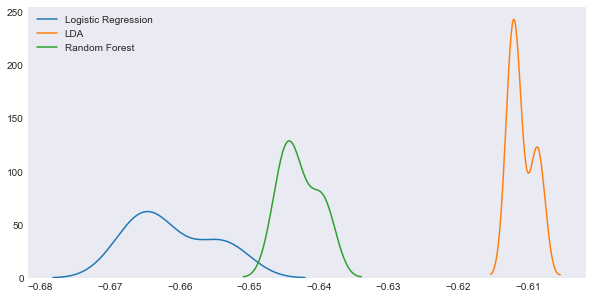

In [75]:
# plot the Log Loss scores
plt.figure(figsize=(10,5))
sns.set_style("dark")

sns.kdeplot(results[0], label="Logistic Regression")
sns.kdeplot(results[1], label="LDA")
sns.kdeplot(results[2], label="Random Forest")

#plt.grid()
plt.legend()
plt.show()

## Assess feature importance

In [120]:
#full_train_fi = full_train[['Dunk', 'Running Jump Shot','Jump Bank Shot','Pullup Jump shot','Layup Shot',
#                            'Layup','Turnaround Fadeaway shot','Step Back Jump shot','Fadeaway Jump Shot',
#                            'Turnaround Jump Shot','Floating Jump shot','Fadeaway Bank shot','Dunk Shot',
#                            'Turnaround Bank shot','Driving Layup Shot','Running Bank shot','shot_made_flag']]

#full_train_fi.head()

### Logistic Regression Feature Importance

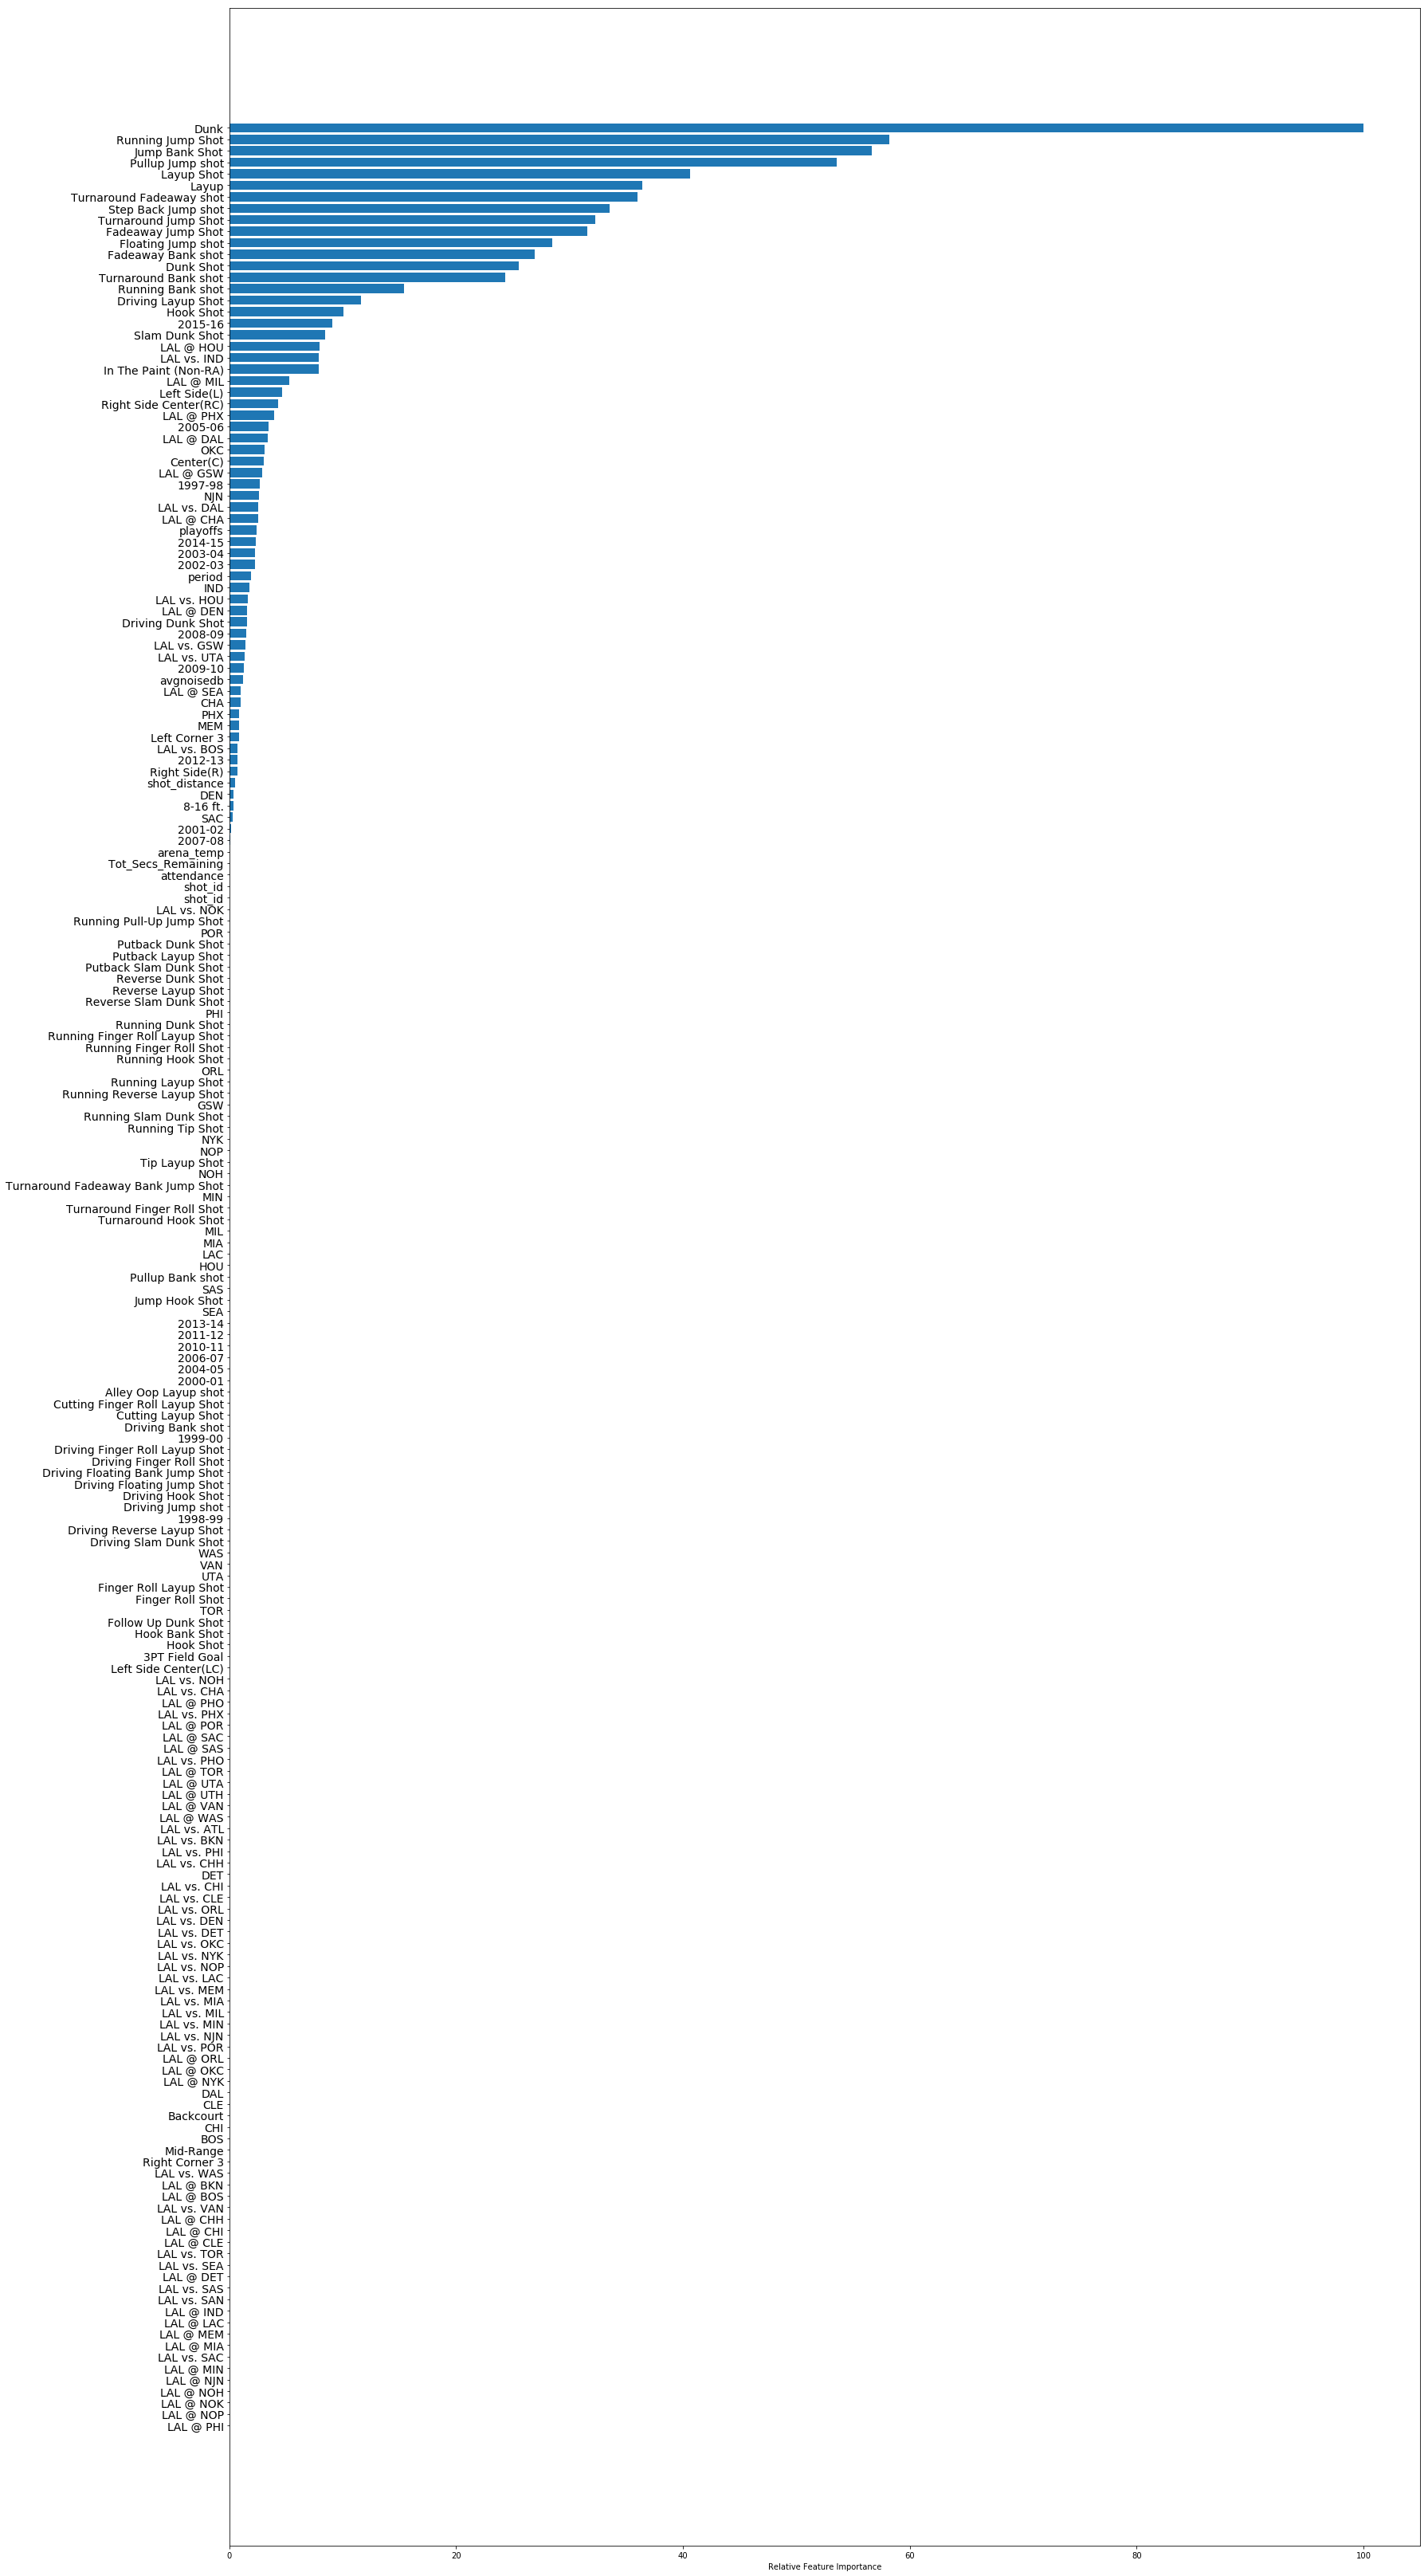

In [101]:
feature_importance = abs(logismodelfull.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(25,45))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=14)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()


In [77]:
#np.array(X.columns)[sorted_idx]

In [125]:
#feature_importance[sorted_idx]

### LDA Feature Importance

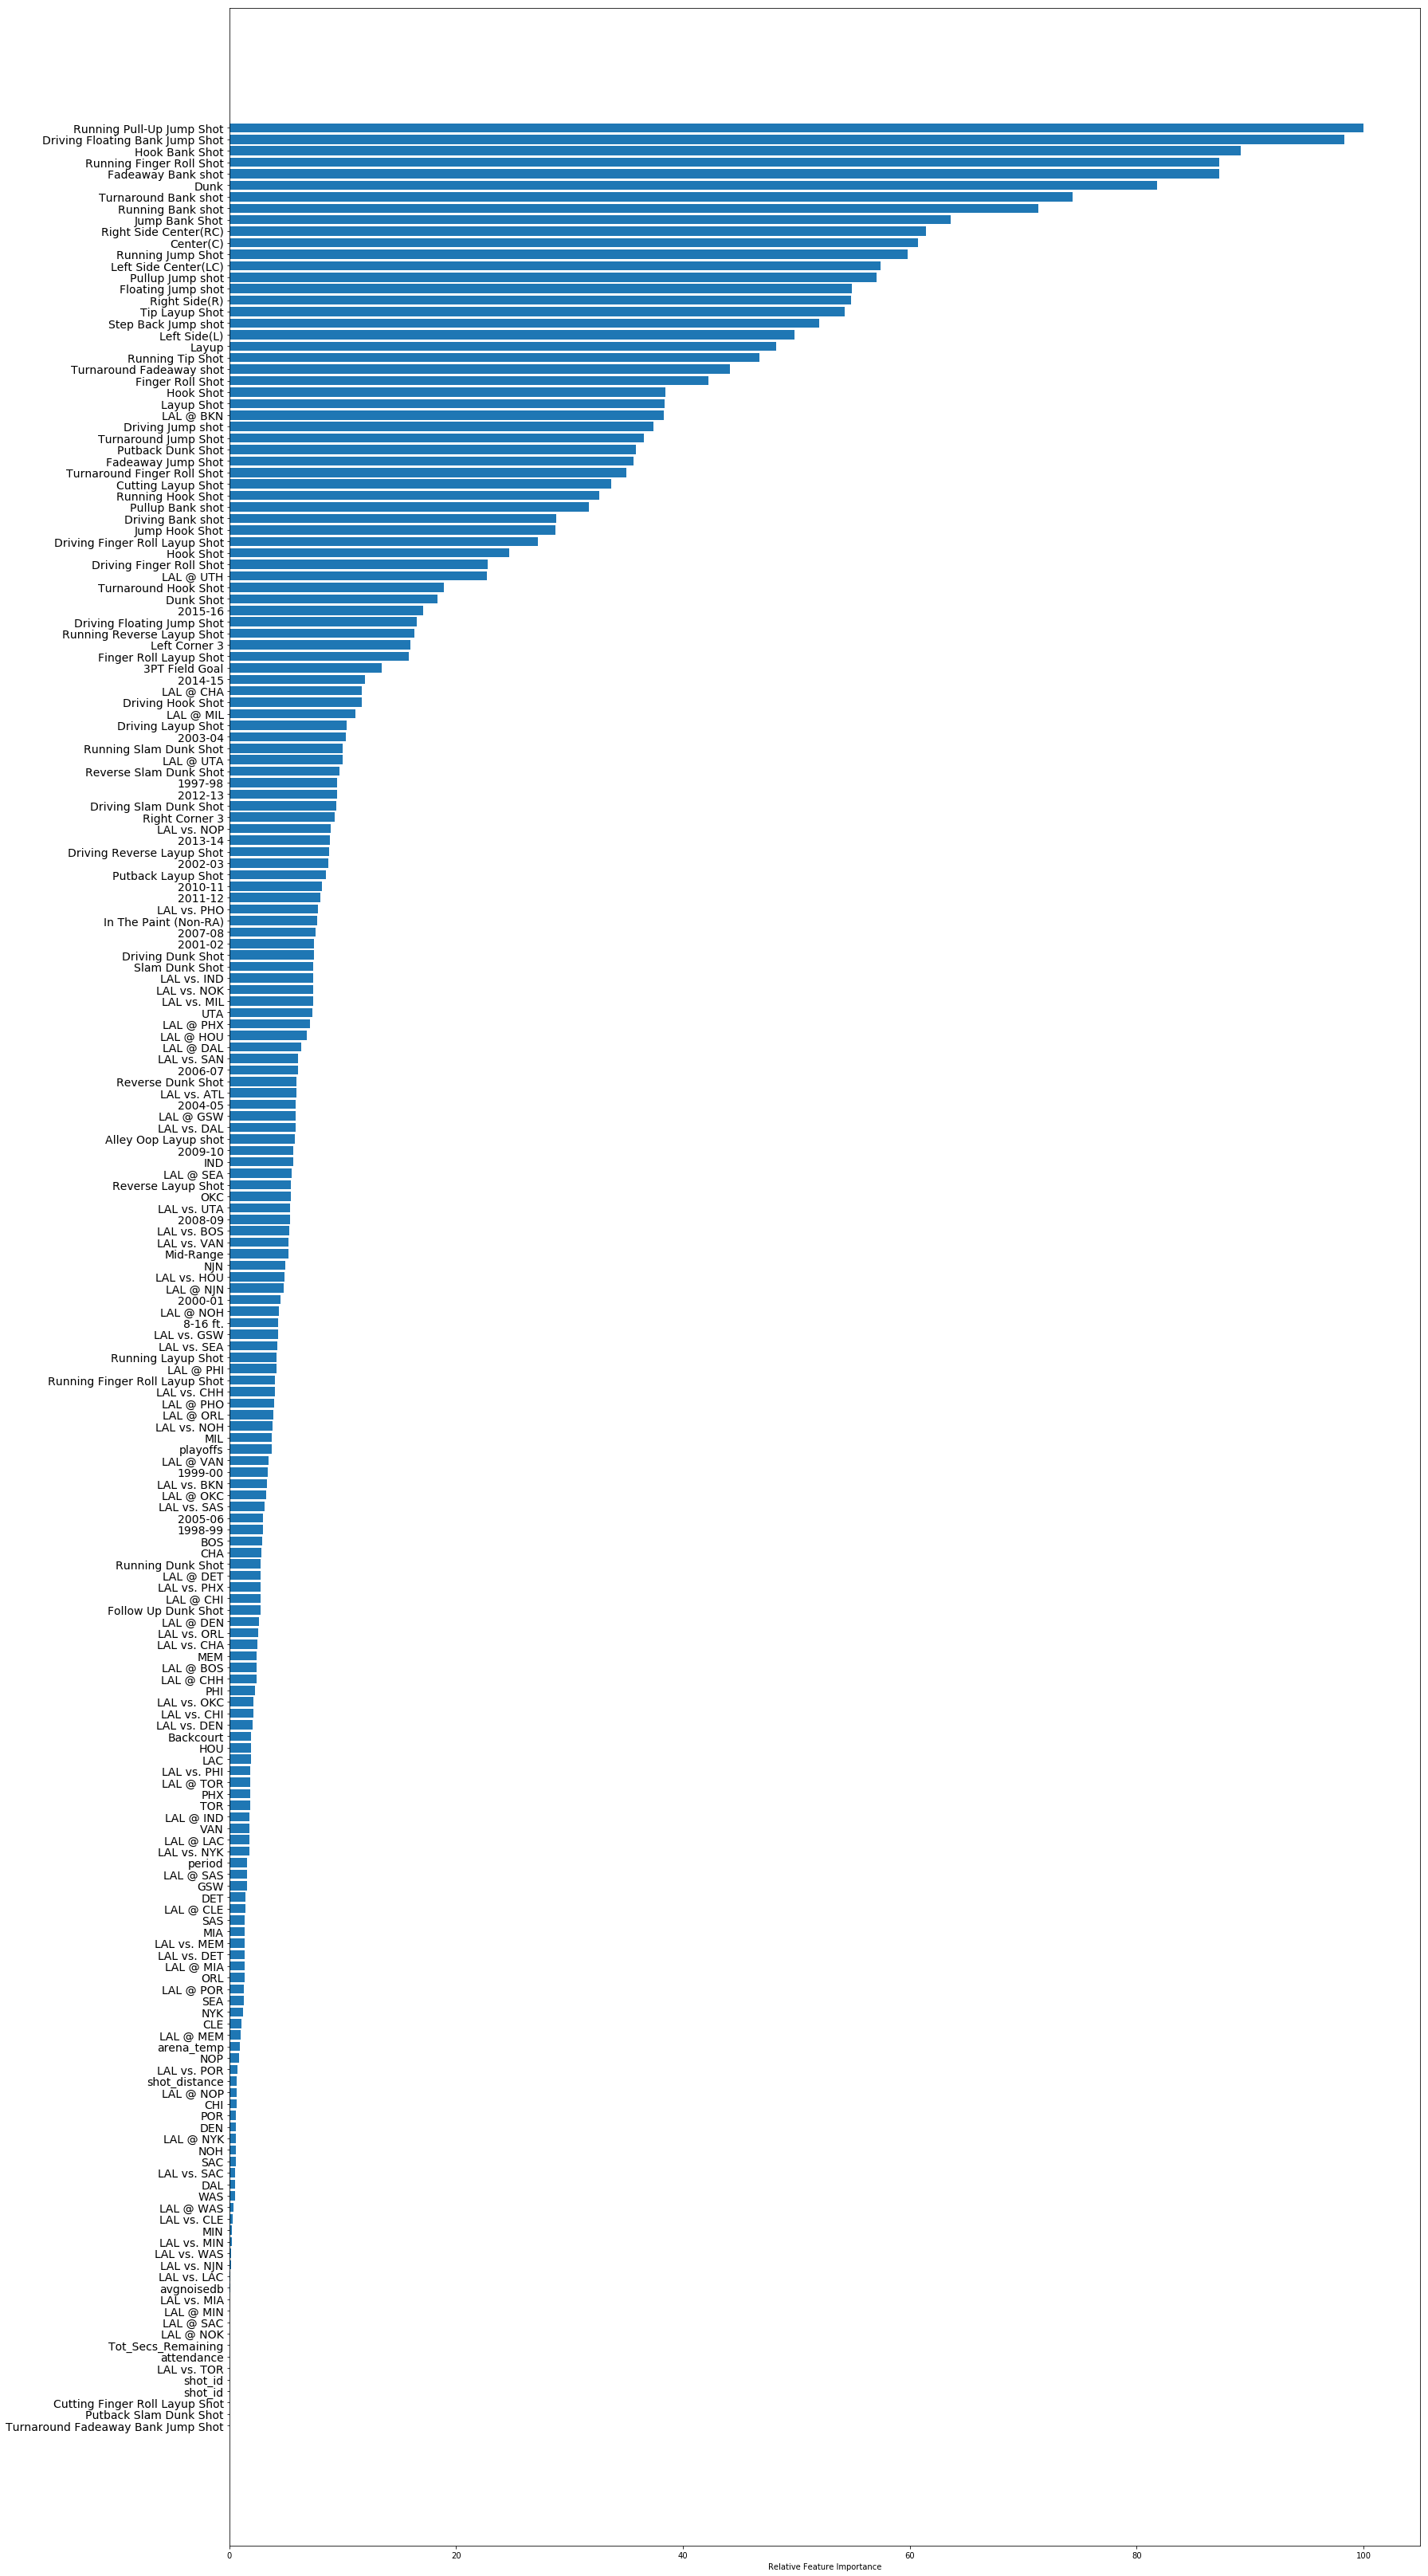

In [102]:
feature_importance = abs(ldamodel.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(25,45))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=14)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

# PCA Analysis

In [28]:
from sklearn.preprocessing import StandardScaler

In [78]:
scalar = StandardScaler()
scalar.fit(full_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [79]:
scaled_data = scalar.transform(full_train)#X_train

In [80]:
from sklearn.decomposition import PCA

In [81]:
pca = PCA(n_components = 2)

In [82]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [83]:
x_pca = pca.transform(scaled_data)

In [84]:
x_pca.shape

(25697, 2)

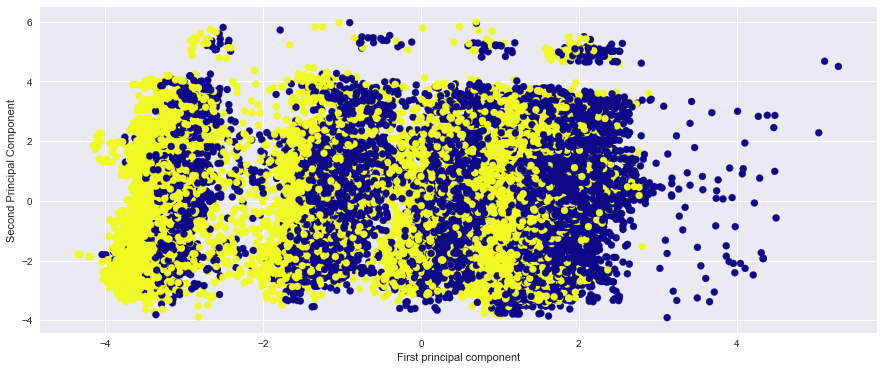

In [86]:
plt.figure(figsize=(15,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=full_train['shot_made_flag'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

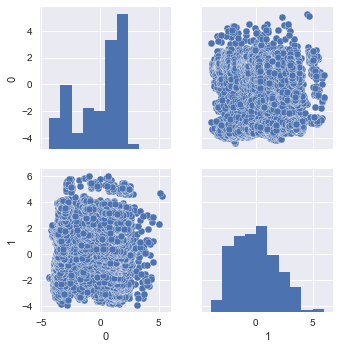

In [87]:
x_pca_df = pd.DataFrame(x_pca)
sns.pairplot(x_pca_df)

In [117]:
x_pca_df.head()

,0,1,2,3,4
0,1.141035,-2.299754,-2.397753,-1.022697,0.316119
1,0.838895,-2.398736,-0.017961,-1.196561,0.571833
2,1.389757,-2.447510,0.202847,-1.272804,0.470119
3,-3.385851,-2.271785,0.083202,-1.136184,1.336868
4,1.128250,-2.298209,-2.311781,-1.034986,0.293866


In [118]:
# Heat Map to get the infulence of principal components with original variables

In [119]:
df_comp = pd.DataFrame(pca.components_,columns=full_train.columns)

In [120]:
df_comp.head()

,period,playoffs,shot_distance,shot_id,attendance,arena_temp,avgnoisedb,Alley Oop Layup shot,Cutting Finger Roll Layup Shot,Cutting Layup Shot,...,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,Tot_Secs_Remaining,shot_made_flag,shot_id
0,0.017906,0.013538,0.440895,0.042058,-0.028238,-0.014326,-0.019250,-0.042787,6.934102e-20,-0.010210,...,0.010617,0.016945,0.030180,0.003018,0.000800,0.028561,0.059728,-0.012666,-0.127305,0.042058
1,-0.002324,0.355996,-0.035232,0.496410,-0.000356,0.007374,0.018949,-0.013615,-5.629193e-19,0.004537,...,0.094487,0.044718,0.101105,0.046540,0.008491,0.032227,0.056018,-0.005747,0.005824,0.496410
2,0.048319,-0.018857,0.191023,0.051772,-0.039873,-0.005587,-0.037412,0.006706,3.273467e-18,0.011518,...,-0.022330,-0.020560,-0.006311,0.024798,0.002108,0.038003,0.071491,-0.093135,-0.054023,0.051772
3,-0.012656,-0.150880,-0.040711,-0.010476,-0.081573,0.028378,-0.067099,-0.001530,2.604940e-18,0.011638,...,0.096488,0.091401,0.139457,0.112217,0.050348,0.026127,0.043451,-0.022351,0.020489,-0.010476
4,-0.014159,-0.070146,0.026375,0.023592,0.190329,0.059644,0.171938,0.007075,4.458031e-18,-0.017686,...,0.053115,-0.006259,0.040580,0.033343,-0.003167,0.004857,-0.009288,-0.021354,0.034922,0.023592


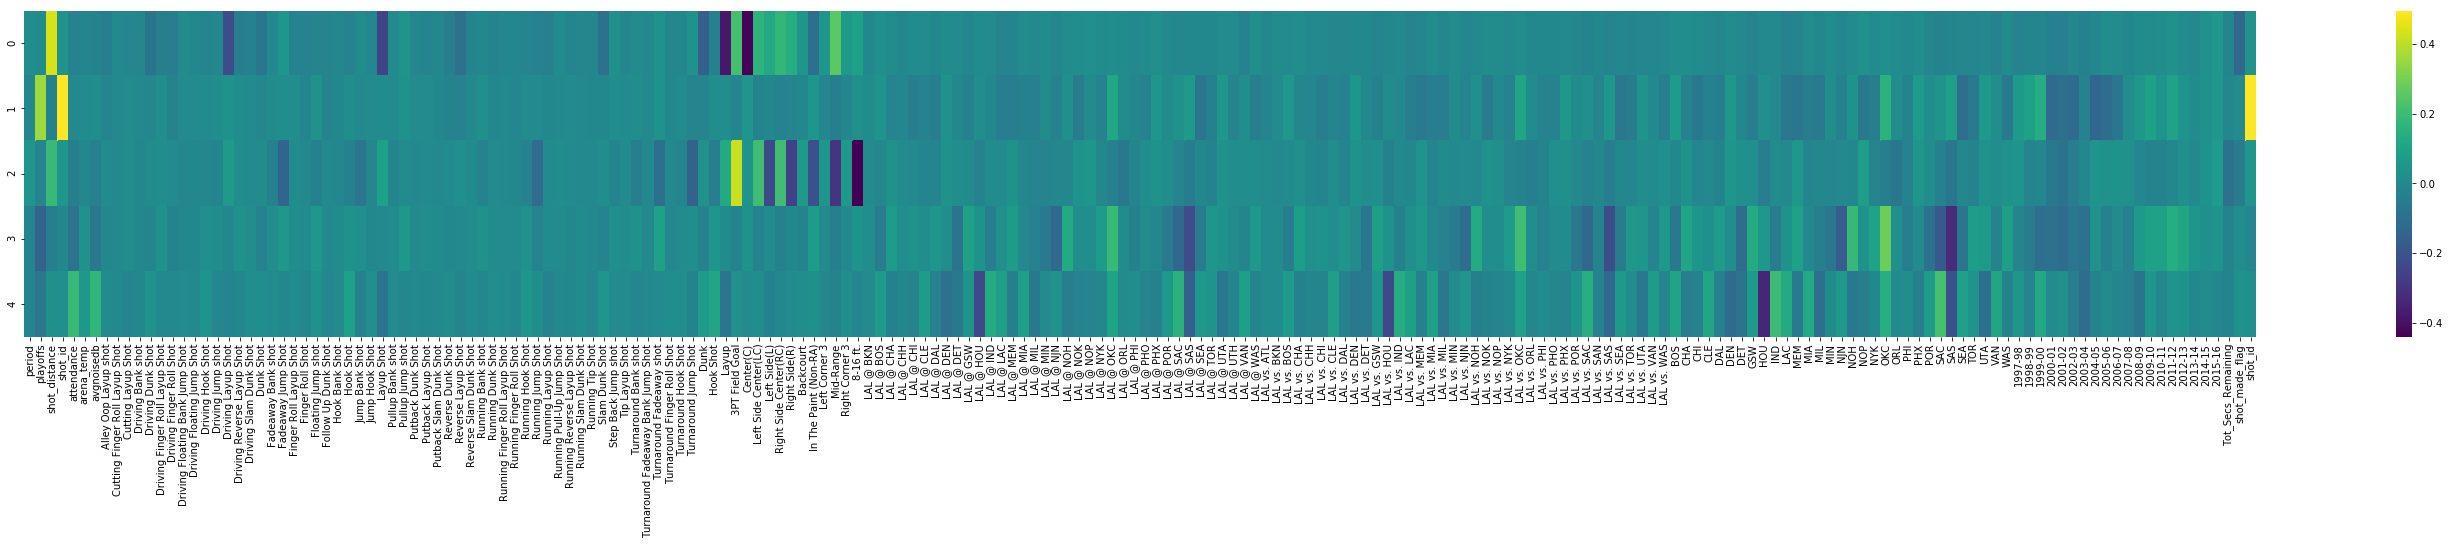

In [121]:
plt.figure(figsize=(50,6))
sns.heatmap(df_comp,cmap='viridis')
